In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
scaler = MinMaxScaler()

### Read Data of Gold Production, BIST100 volume, and Housing Prices Indexes as candidates to be Response Varables

In [2]:
BIST100_volume = pd.read_excel("BIST100_işlem_hacmi_aylık.xlsx")    # BIST 100 Toplam İşlem Hacmi (Bin TL)
BIST100_volume.rename(columns={'TP MK ISL HC': 'value'}, inplace=True)

gold_production = pd.read_excel("gold_production.xlsx")         # BIST-Maden Firmalarının Altın Üretim Bildirimleri (Kg)(Aylık)
gold_production.rename(columns={'TP URALTIN ALTINKG': 'value'}, inplace=True)

housing_price_index_ist = pd.read_excel("housingprice_index_ist.xlsx") # Konut Fiyat Endeksi (KFE) (2017=100)(Aylık) - İstanbul
housing_price_index_ist.rename(columns={'TP HKFE02': 'value'}, inplace=True)

response_variables = [BIST100_volume, gold_production, housing_price_index_ist]

correlation = [i["value"].corr(j["value"]) for i in response_variables for j in response_variables]
correlation

[1.0,
 0.34457372627488236,
 0.9046112122431679,
 0.34457372627488236,
 1.0,
 0.3029161725749755,
 0.904611212243168,
 0.3029161725749755,
 1.0]

### Housing price index for Istanbul and BIST100 transaction volumes are highly correlated. We'll replace the housing price index with Central Bank's Current Account Level.

In [3]:
cb_current_account = pd.read_excel("cb_current_account.xlsx")   # Cari İşlemler Hesabı (Milyon ABD doları)-Düzey
cb_current_account.rename(columns={'TP HARICCARIACIK K1': 'value'}, inplace=True)

response_variables = [BIST100_volume, gold_production, cb_current_account]

correlation = [i["value"].corr(j["value"]) for i in response_variables for j in response_variables]
correlation

[1.0,
 0.34457372627488236,
 -0.004539436665594834,
 0.34457372627488236,
 1.0,
 0.3026007607182663,
 -0.004539436665594834,
 0.30260076071826625,
 0.9999999999999998]

# Linear Regressions

### The procedure for building regression model is as follows for the 3 models: 
### 1. Read Data for Response variable and standardize with MinMax Scaler
### 2. Collect and read data for independent varibles and standardize with MinMax Scaler
### 3. For each independent variable, plot data itself with respect to time 
### 4. For each independent variable, plot data with respect to the target (response) variable to check the linear relationship assumption
### 5. Build the linear regression model
### 6. Check the actual and fitted data with line and scatter plots
### 7. Calculate residuals and check for zero mean and constant variance assumptions
### 8. Search for any improvements and go back to step 5

# Linear Regression for BIST100 Weekly Transaction Volume

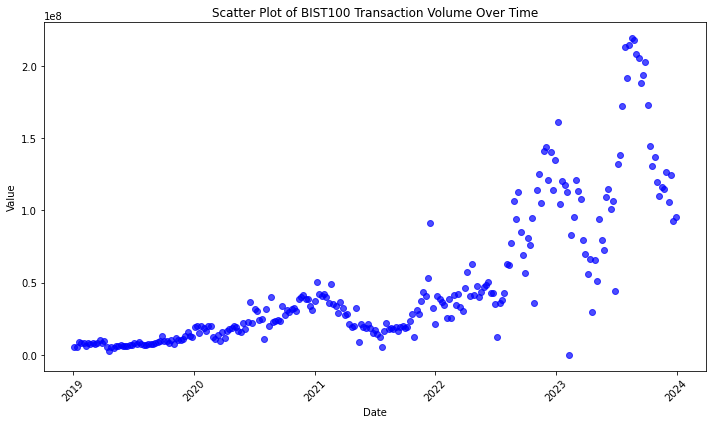

In [4]:
BIST100_volume = pd.read_excel("BIST100_tradevolume.xlsx")    # BIST 100 Haftalık Toplam İşlem Hacmi (Bin TL)
BIST100_volume.rename(columns={'TP MK ISL HC': 'value'}, inplace=True)
BIST100_volume['Tarih'] = pd.to_datetime(BIST100_volume['Tarih'], format='%d-%m-%Y')

plt.figure(figsize=(10, 6)) 
plt.scatter(BIST100_volume['Tarih'], BIST100_volume['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of BIST100 Transaction Volume Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

In [5]:
BIST100_volume

,Tarih,value
0,2019-01-04,5.381226e+06
1,2019-01-11,5.757926e+06
2,2019-01-18,8.699173e+06
3,2019-01-25,8.319481e+06
4,2019-02-01,7.956973e+06
...,...,...
256,2023-12-01,1.266054e+08
257,2023-12-08,1.057407e+08
258,2023-12-15,1.246756e+08
259,2023-12-22,9.242148e+07


In [6]:
BIST100_volume['Normalized'] = scaler.fit_transform(BIST100_volume[['value']])
BIST100_volume

,Tarih,value,Normalized
0,2019-01-04,5.381226e+06,0.024561
1,2019-01-11,5.757926e+06,0.026280
2,2019-01-18,8.699173e+06,0.039704
3,2019-01-25,8.319481e+06,0.037971
4,2019-02-01,7.956973e+06,0.036317
...,...,...,...
256,2023-12-01,1.266054e+08,0.577847
257,2023-12-08,1.057407e+08,0.482617
258,2023-12-15,1.246756e+08,0.569038
259,2023-12-22,9.242148e+07,0.421826


## Weekly Google Trends Data for "Borsa"

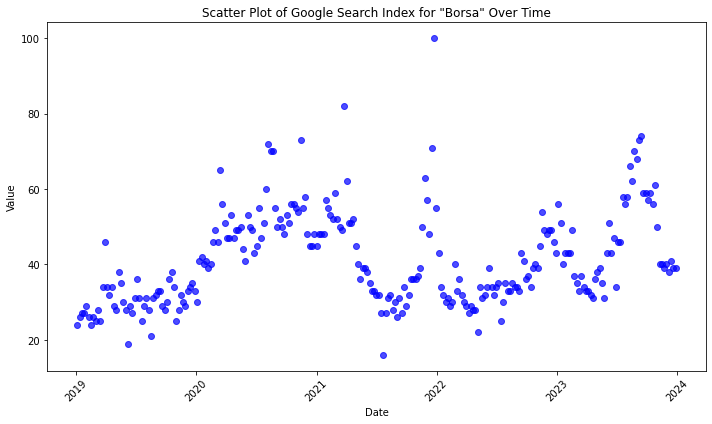

In [7]:
trends_borsa = pd.read_excel("googletrends_borsa.xlsx")    # Google Trends Search Index for "Borsa"
trends_borsa.rename(columns={'borsa': 'value'}, inplace=True)
trends_borsa['Tarih'] = pd.to_datetime(trends_borsa['Tarih'], format='%d-%m-%Y')

plt.figure(figsize=(10, 6)) 
plt.scatter(trends_borsa['Tarih'], trends_borsa['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Google Search Index for "Borsa" Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

In [8]:
trends_borsa

,Tarih,value
0,2019-01-04,24
1,2019-01-11,26
2,2019-01-18,27
3,2019-01-25,27
4,2019-02-01,29
...,...,...
256,2023-12-01,40
257,2023-12-08,38
258,2023-12-15,41
259,2023-12-22,39


In [9]:
trends_borsa['Normalized'] = scaler.fit_transform(trends_borsa[['value']])
trends_borsa

,Tarih,value,Normalized
0,2019-01-04,24,0.095238
1,2019-01-11,26,0.119048
2,2019-01-18,27,0.130952
3,2019-01-25,27,0.130952
4,2019-02-01,29,0.154762
...,...,...,...
256,2023-12-01,40,0.285714
257,2023-12-08,38,0.261905
258,2023-12-15,41,0.297619
259,2023-12-22,39,0.273810


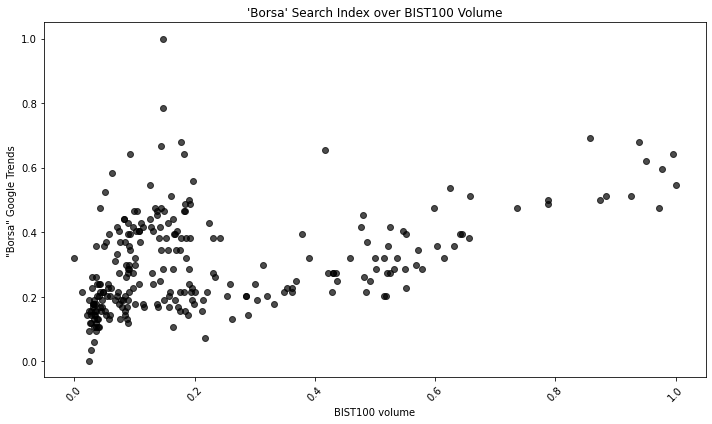

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(BIST100_volume['Normalized'], trends_borsa['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('BIST100 volume')
plt.ylabel('"Borsa" Google Trends')
plt.title("'Borsa' Search Index over BIST100 Volume")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

#### It seems like we have a reasonable linear relationship between BIST100 volume and "Borsa" search index in Google Trends. The first independent variable will be the "Borsa" Search Index

## Weekly Google Trends Data for "BIST100"

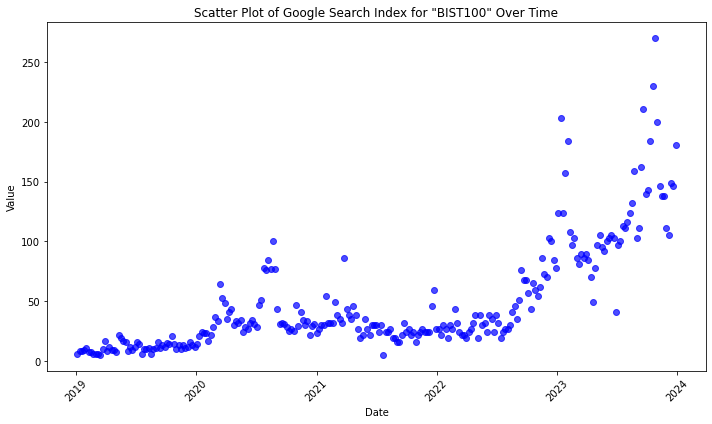

In [11]:
trends_BIST100 = pd.read_excel("googletrends_BIST100.xlsx")    # Google Trends Search Index for "BIST100"
trends_BIST100.rename(columns={'BIST100': 'value'}, inplace=True)
trends_BIST100['Tarih'] = pd.to_datetime(trends_BIST100['Tarih'], format='%d-%m-%Y')

plt.figure(figsize=(10, 6)) 
plt.scatter(trends_BIST100['Tarih'], trends_BIST100['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Google Search Index for "BIST100" Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

In [12]:
trends_BIST100

,Tarih,value
0,2019-01-04,6
1,2019-01-11,8
2,2019-01-18,8
3,2019-01-25,9
4,2019-02-01,11
...,...,...
256,2023-12-01,111
257,2023-12-08,105
258,2023-12-15,149
259,2023-12-22,146


In [13]:
trends_BIST100['Normalized'] = scaler.fit_transform(trends_BIST100[['value']])
trends_BIST100

,Tarih,value,Normalized
0,2019-01-04,6,0.003774
1,2019-01-11,8,0.011321
2,2019-01-18,8,0.011321
3,2019-01-25,9,0.015094
4,2019-02-01,11,0.022642
...,...,...,...
256,2023-12-01,111,0.400000
257,2023-12-08,105,0.377358
258,2023-12-15,149,0.543396
259,2023-12-22,146,0.532075


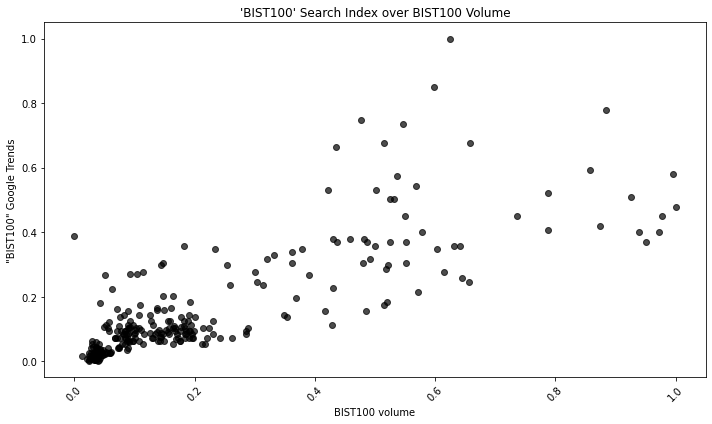

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(BIST100_volume['Normalized'], trends_BIST100['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('BIST100 volume')
plt.ylabel('"BIST100" Google Trends')
plt.title("'BIST100' Search Index over BIST100 Volume")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

#### Compared to the "Borsa" search, "BIST100" search in Google Trends has a better linear relationship with BIST100 volume. The second independent variable will be "BIST100" search index.

## BIST Overnight Repo Rates (Weighted Average, Weekly)

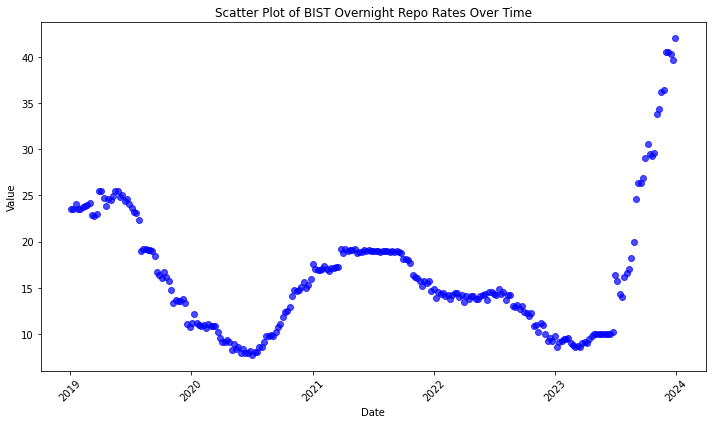

In [15]:
repo_rates = pd.read_excel("BIST_repo_rates.xlsx")    # BIST Gecelik Repo Faizleri Ağırlıklı Ortalama Faiz Oranı
repo_rates.rename(columns={'TP AOFOBAP': 'value'}, inplace=True)
repo_rates['Tarih'] = pd.to_datetime(repo_rates['Tarih'], format='%d-%m-%Y')

plt.figure(figsize=(10, 6)) 
plt.scatter(repo_rates['Tarih'], repo_rates['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of BIST Overnight Repo Rates Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

In [16]:
repo_rates

,Tarih,value
0,2019-01-04,23.585
1,2019-01-11,23.528
2,2019-01-18,24.074
3,2019-01-25,23.512
4,2019-02-01,23.556
...,...,...
256,2023-12-01,40.484
257,2023-12-08,40.484
258,2023-12-15,40.356
259,2023-12-22,39.638


In [17]:
repo_rates['Normalized'] = scaler.fit_transform(repo_rates[['value']])
repo_rates

,Tarih,value,Normalized
0,2019-01-04,23.585,0.462129
1,2019-01-11,23.528,0.460466
2,2019-01-18,24.074,0.476396
3,2019-01-25,23.512,0.459999
4,2019-02-01,23.556,0.461283
...,...,...,...
256,2023-12-01,40.484,0.955185
257,2023-12-08,40.484,0.955185
258,2023-12-15,40.356,0.951450
259,2023-12-22,39.638,0.930501


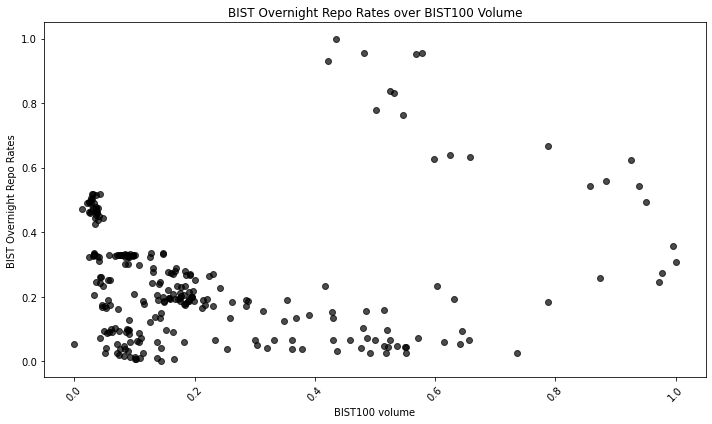

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(BIST100_volume['Normalized'], repo_rates['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('BIST100 volume')
plt.ylabel('BIST Overnight Repo Rates')
plt.title("BIST Overnight Repo Rates over BIST100 Volume")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

#### Although overnight REPO rates has a weak linear relationship with BIST100 volume, we will keep it as another independent variable and check its p-value later in the model.

## Weekly BIST100 Closing Index 

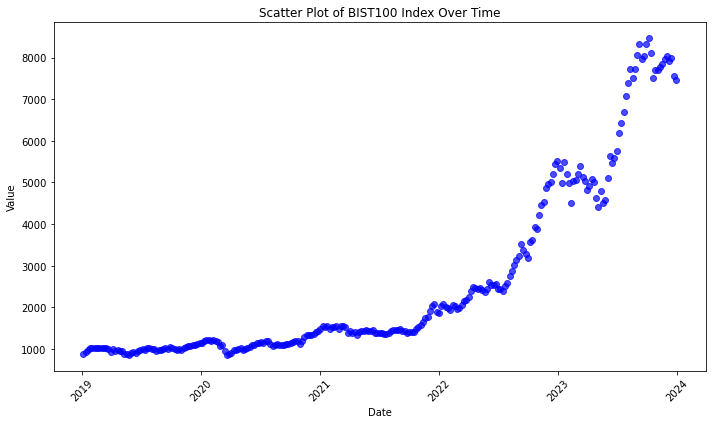

In [19]:
BIST100_index = pd.read_excel("BIST100_index.xlsx")    # BİST 100 Endeks (XU100), Kapanış Fiyatlarına Göre(Ocak 1986=0,01)
BIST100_index.rename(columns={'TP MK F BILESIK': 'value'}, inplace=True)
BIST100_index['Tarih'] = pd.to_datetime(BIST100_index['Tarih'], format='%d-%m-%Y')

plt.figure(figsize=(10, 6)) 
plt.scatter(BIST100_index['Tarih'], BIST100_index['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of BIST100 Index Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

In [20]:
BIST100_index

,Tarih,value
0,2019-01-04,888.31
1,2019-01-11,916.87
2,2019-01-18,984.55
3,2019-01-25,1018.01
4,2019-02-01,1029.37
...,...,...
256,2023-12-01,8026.27
257,2023-12-08,7913.76
258,2023-12-15,7993.85
259,2023-12-22,7557.56


In [21]:
BIST100_index['Normalized'] = scaler.fit_transform(BIST100_index[['value']])
BIST100_index

,Tarih,value,Normalized
0,2019-01-04,888.31,0.003990
1,2019-01-11,916.87,0.007744
2,2019-01-18,984.55,0.016641
3,2019-01-25,1018.01,0.021040
4,2019-02-01,1029.37,0.022533
...,...,...,...
256,2023-12-01,8026.27,0.942334
257,2023-12-08,7913.76,0.927544
258,2023-12-15,7993.85,0.938073
259,2023-12-22,7557.56,0.880719


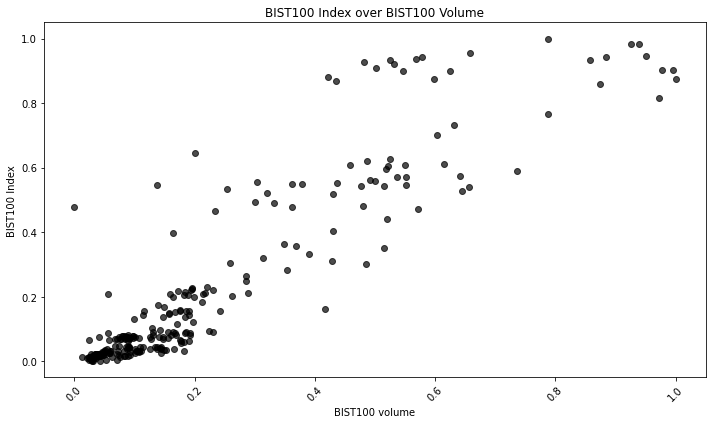

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(BIST100_volume['Normalized'], BIST100_index['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('BIST100 volume')
plt.ylabel('BIST100 Index')
plt.title("BIST100 Index over BIST100 Volume")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

#### BIST100 index has a very good linear relationship with BIST100 volume as expected. The last independent variable will be the BIST100 index.

## First Model

In [23]:
# Merge datasets based on the shared date index
BIST100_data = BIST100_volume[['Normalized']].copy()  # Create a new DataFrame with gold_production's 'value' column
BIST100_data = BIST100_data.merge(trends_borsa[['Normalized']], left_index=True, right_index=True, suffixes=('_volume', '_trends'))
BIST100_data = BIST100_data.merge(trends_BIST100[['Normalized']], left_index=True, right_index=True)
BIST100_data = BIST100_data.merge(repo_rates[['Normalized']], left_index=True, right_index=True)
BIST100_data = BIST100_data.merge(BIST100_index[['Normalized']], left_index=True, right_index=True)

# Rename columns for clarity
BIST100_data.columns = ['BIST100_volume', 'trends_borsa', 'trends_BIST100', 'repo_rates', 'BIST100_index']

BIST100_data

,BIST100_volume,trends_borsa,trends_BIST100,repo_rates,BIST100_index
0,0.024561,0.095238,0.003774,0.462129,0.003990
1,0.026280,0.119048,0.011321,0.460466,0.007744
2,0.039704,0.130952,0.011321,0.476396,0.016641
3,0.037971,0.130952,0.015094,0.459999,0.021040
4,0.036317,0.154762,0.022642,0.461283,0.022533
...,...,...,...,...,...
256,0.577847,0.285714,0.400000,0.955185,0.942334
257,0.482617,0.261905,0.377358,0.955185,0.927544
258,0.569038,0.297619,0.543396,0.951450,0.938073
259,0.421826,0.273810,0.532075,0.930501,0.880719


In [24]:
# Prepare the data for regression analysis
X = BIST100_data[['trends_borsa', 'trends_BIST100', 'repo_rates', 'BIST100_index']]
y = BIST100_data['BIST100_volume']


# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         BIST100_volume   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              1006.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                   1.33e-155
Time:                        22:59:32   Log-Likelihood:                          293.47
No. Observations:                 261   AIC:                                     -578.9
Df Residuals:                     257   BIC:                                     -564.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [25]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 6.310773780049073


#### R-squared value came out to be 0.939, which is above satisfactory. All the independent variables seem very reasonable in terms of their p-values (below 0.000). The Google Trends data of searching for 'Borsa' has a positive effect on BIST100 volume as expected (coefficient of 0.3447). On the other hand, The Google Trends data of searching for 'BIST100' has a negative effect on the response, which is unexpected (coefficient of -0.2606).The overnight repo rates has a coefficient of (-0.1218) which is reasonable. The most powerful independent variable is BIS100 index, which is expected and understandable. 

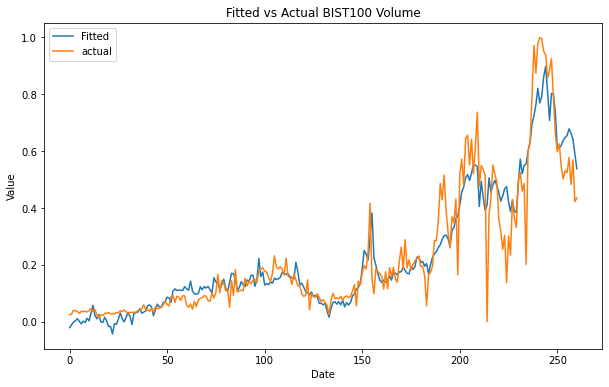

In [26]:
fitted = 0.3447*trends_borsa["Normalized"] -0.2606*trends_BIST100["Normalized"] + -0.1218*repo_rates["Normalized"] + 0.8496*BIST100_index["Normalized"]

plt.figure(figsize=(10, 6))
plt.plot(fitted, label='Fitted')
plt.plot(BIST100_volume["Normalized"], label='actual')

plt.title('Fitted vs Actual BIST100 Volume')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

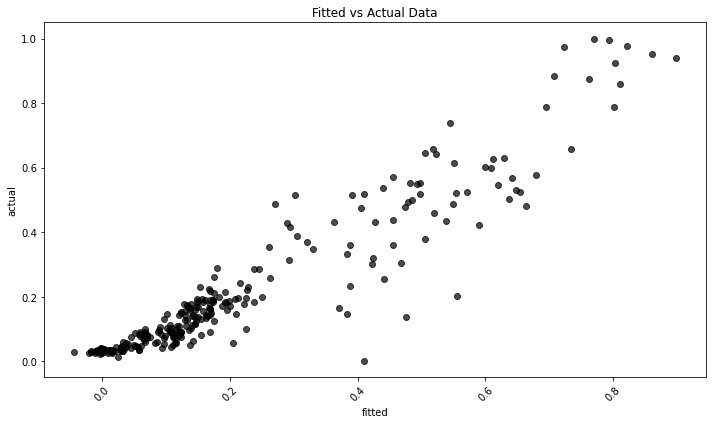

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(fitted, BIST100_volume["Normalized"], color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('actual')
plt.title("Fitted vs Actual Data")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Mean of residuals:  0.0007528748758402063


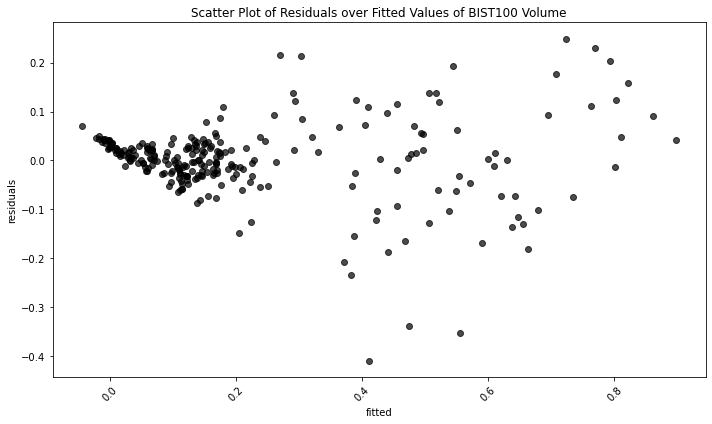

In [28]:
residuals = BIST100_volume['Normalized'] - fitted
print("Mean of residuals: ",residuals.mean())

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('residuals')
plt.title('Scatter Plot of Residuals over Fitted Values of BIST100 Volume')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### The above Residuals vs. Fitted value graph is generated to check the assumptions of zero mean and constant variance of the residuals. The mean seem very close to zero, and calculated as 0.001. For the variance, we may not say that it is constant. As the fitted values increase, the variance of residuals also increase. Let's check the autocorrelation function of residuals and see if we can add lagged values to te model.

<Figure size 720x432 with 0 Axes>

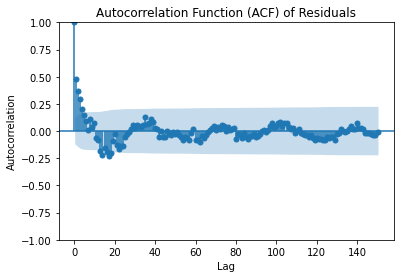

In [29]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

#### The ACF for residuals drops below the limits after 3rd lag. Let's try adding X(t-1) - previous period's BIST100 volume - as another independent variable.

## Second Model

In [30]:
BIST100_volume['lag1'] = BIST100_volume['Normalized'].shift(1)
BIST100_volume

,Tarih,value,Normalized,lag1
0,2019-01-04,5.381226e+06,0.024561,NaN
1,2019-01-11,5.757926e+06,0.026280,0.024561
2,2019-01-18,8.699173e+06,0.039704,0.026280
3,2019-01-25,8.319481e+06,0.037971,0.039704
4,2019-02-01,7.956973e+06,0.036317,0.037971
...,...,...,...,...
256,2023-12-01,1.266054e+08,0.577847,0.524378
257,2023-12-08,1.057407e+08,0.482617,0.577847
258,2023-12-15,1.246756e+08,0.569038,0.482617
259,2023-12-22,9.242148e+07,0.421826,0.569038


In [31]:
BIST100_volume['lag1'] = BIST100_volume['lag1'].fillna(0.024561)
BIST100_volume

,Tarih,value,Normalized,lag1
0,2019-01-04,5.381226e+06,0.024561,0.024561
1,2019-01-11,5.757926e+06,0.026280,0.024561
2,2019-01-18,8.699173e+06,0.039704,0.026280
3,2019-01-25,8.319481e+06,0.037971,0.039704
4,2019-02-01,7.956973e+06,0.036317,0.037971
...,...,...,...,...
256,2023-12-01,1.266054e+08,0.577847,0.524378
257,2023-12-08,1.057407e+08,0.482617,0.577847
258,2023-12-15,1.246756e+08,0.569038,0.482617
259,2023-12-22,9.242148e+07,0.421826,0.569038


In [32]:
# Merge datasets based on the shared date index
BIST100_data = BIST100_volume[['Normalized']].copy()  # Create a new DataFrame with gold_production's 'value' column
BIST100_data = BIST100_data.merge(trends_borsa[['Normalized']], left_index=True, right_index=True, suffixes=('_volume', '_trends'))
BIST100_data = BIST100_data.merge(trends_BIST100[['Normalized']], left_index=True, right_index=True)
BIST100_data = BIST100_data.merge(repo_rates[['Normalized']], left_index=True, right_index=True)
BIST100_data = BIST100_data.merge(BIST100_index[['Normalized']], left_index=True, right_index=True)
BIST100_data = BIST100_data.merge(BIST100_volume[['lag1']], left_index=True, right_index=True)

# Rename columns for clarity
BIST100_data.columns = ['BIST100_volume', 'trends_borsa', 'trends_BIST100', 'repo_rates', 'BIST100_index', 'lag1']

BIST100_data

,BIST100_volume,trends_borsa,trends_BIST100,repo_rates,BIST100_index,lag1
0,0.024561,0.095238,0.003774,0.462129,0.003990,0.024561
1,0.026280,0.119048,0.011321,0.460466,0.007744,0.024561
2,0.039704,0.130952,0.011321,0.476396,0.016641,0.026280
3,0.037971,0.130952,0.015094,0.459999,0.021040,0.039704
4,0.036317,0.154762,0.022642,0.461283,0.022533,0.037971
...,...,...,...,...,...,...
256,0.577847,0.285714,0.400000,0.955185,0.942334,0.524378
257,0.482617,0.261905,0.377358,0.955185,0.927544,0.577847
258,0.569038,0.297619,0.543396,0.951450,0.938073,0.482617
259,0.421826,0.273810,0.532075,0.930501,0.880719,0.569038


In [33]:
# Prepare the data for regression analysis
X = BIST100_data[['trends_borsa', 'trends_BIST100', 'repo_rates', 'BIST100_index', 'lag1']]
y = BIST100_data['BIST100_volume']


# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         BIST100_volume   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1041.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                   8.34e-168
Time:                        22:59:34   Log-Likelihood:                          325.72
No. Observations:                 261   AIC:                                     -641.4
Df Residuals:                     256   BIC:                                     -623.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [34]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 5.119243104304259


#### The R-squared value increased from 0.939 to 0.952 with the addition of lagged 1 value of BIST100 volume. The MSE of the model is also improved from 6.31 to 5.12. All independent variables has a significant effect on the volume as their p-values are below 0.001. The effects in terms of direction are the same. Remember in the previous model, the coefficient of BIST100 index had the biggest absolute value. In this model, it shares the effect with lag1 value (coefficients of 0.4930 and 0.4600). It can be concluded that adding lagged-1 value of production resulted in a better model. 

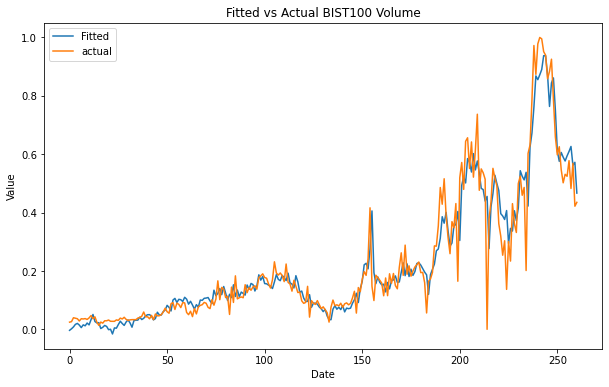

In [35]:
fitted = 0.2040*trends_borsa["Normalized"] -0.2035*trends_BIST100["Normalized"] + -0.0766*repo_rates["Normalized"] + 0.4930*BIST100_index["Normalized"] + 0.4600*BIST100_volume['lag1']

plt.figure(figsize=(10, 6))
plt.plot(fitted, label='Fitted')
plt.plot(BIST100_volume["Normalized"], label='actual')

plt.title('Fitted vs Actual BIST100 Volume')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

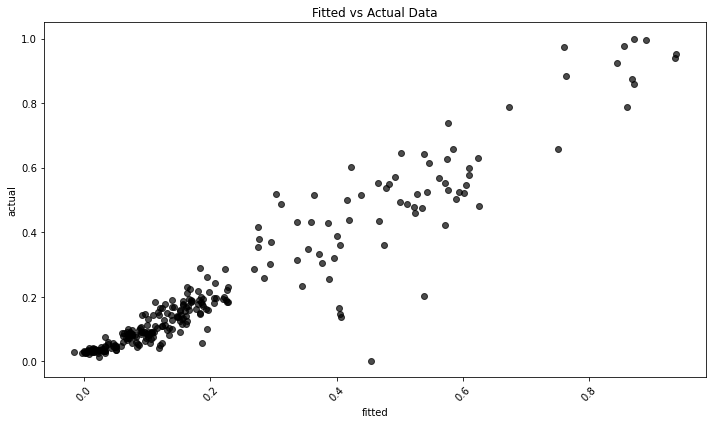

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(fitted, BIST100_volume["Normalized"], color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('actual')
plt.title("Fitted vs Actual Data")

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Mean of Residuals:  0.0010919322076245162


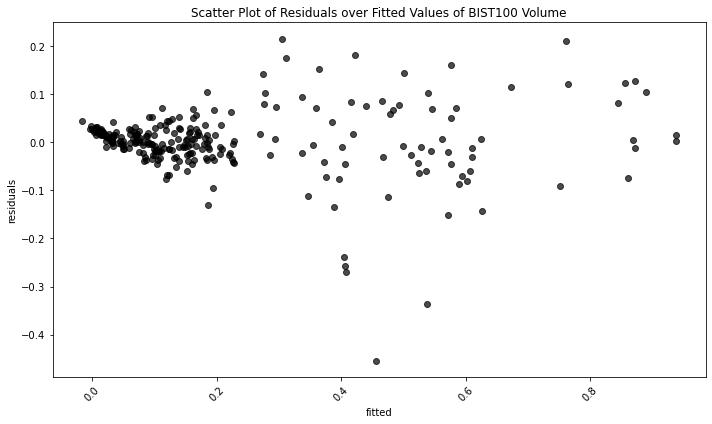

In [37]:
residuals = BIST100_volume['Normalized'] - fitted
print("Mean of Residuals: ", residuals.mean())

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('residuals')
plt.title('Scatter Plot of Residuals over Fitted Values of BIST100 Volume')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Let's check the assumptions for Residuals for the second model. The mean seem the same with the previous model, as it is calculated as 0.001 and the points are centered around zero in the graph. The variance, however, seem improved since the points are diversing less compared to the previous model as the fitted values increase.

<Figure size 720x432 with 0 Axes>

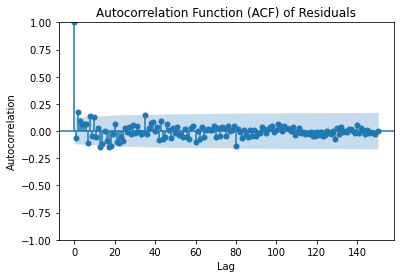

In [38]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

#### The ACF for residuals is also improved with the addition of lagged-1 values, as expected. Now it drops very close to the limits in the first lag. The model is completed. 

# Linear Regression for Monthly Gold Production of BIST Mining Companies 

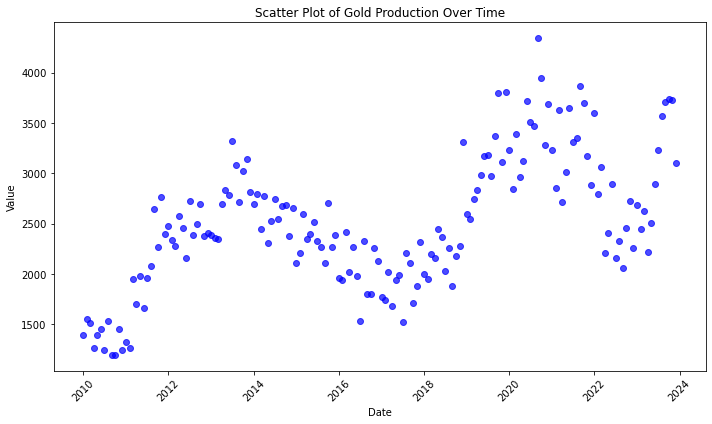

In [39]:
gold_production['Tarih'] = pd.to_datetime(gold_production['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(gold_production['Tarih'], gold_production['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Gold Production Over Time')

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

In [40]:
gold_production

,Tarih,value
0,2010-01-01,1394.480
1,2010-02-01,1556.080
2,2010-03-01,1509.720
3,2010-04-01,1265.910
4,2010-05-01,1390.270
...,...,...
163,2023-08-01,3569.637
164,2023-09-01,3707.483
165,2023-10-01,3740.100
166,2023-11-01,3724.129


In [41]:
gold_production['Normalized'] = scaler.fit_transform(gold_production[['value']])
gold_production

,Tarih,value,Normalized
0,2010-01-01,1394.480,0.063475
1,2010-02-01,1556.080,0.114823
2,2010-03-01,1509.720,0.100092
3,2010-04-01,1265.910,0.022623
4,2010-05-01,1390.270,0.062138
...,...,...,...
163,2023-08-01,3569.637,0.754615
164,2023-09-01,3707.483,0.798414
165,2023-10-01,3740.100,0.808778
166,2023-11-01,3724.129,0.803703


## Cumhuriyet Altini Monthly Selling Prices (TL)

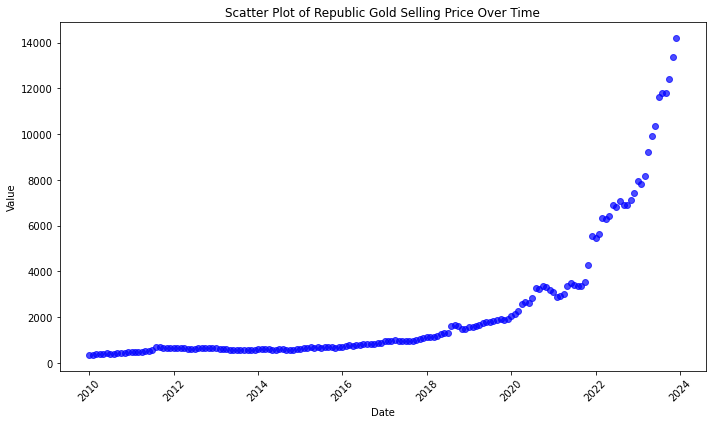

In [42]:
cmh_selling_price = pd.read_excel("cumh_altini_sellingprice.xlsx")   # Cumhuriyet Altını Satış Fiyatı (TL/Adet)
cmh_selling_price.rename(columns={'TP MK CUM YTL': 'value'}, inplace=True)
cmh_selling_price['Tarih'] = pd.to_datetime(cmh_selling_price['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(cmh_selling_price['Tarih'], cmh_selling_price['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Republic Gold Selling Price Over Time')

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

In [43]:
cmh_selling_price

,Tarih,value
0,2010-01-01,354.50
1,2010-02-01,363.00
2,2010-03-01,371.00
3,2010-04-01,373.20
4,2010-05-01,403.75
...,...,...
163,2023-08-01,11805.00
164,2023-09-01,11774.00
165,2023-10-01,12387.50
166,2023-11-01,13387.50


In [44]:
cmh_selling_price['Normalized'] = scaler.fit_transform(cmh_selling_price[['value']])
cmh_selling_price

,Tarih,value,Normalized
0,2010-01-01,354.50,0.000000
1,2010-02-01,363.00,0.000614
2,2010-03-01,371.00,0.001193
3,2010-04-01,373.20,0.001352
4,2010-05-01,403.75,0.003560
...,...,...,...
163,2023-08-01,11805.00,0.827767
164,2023-09-01,11774.00,0.825526
165,2023-10-01,12387.50,0.869876
166,2023-11-01,13387.50,0.942167


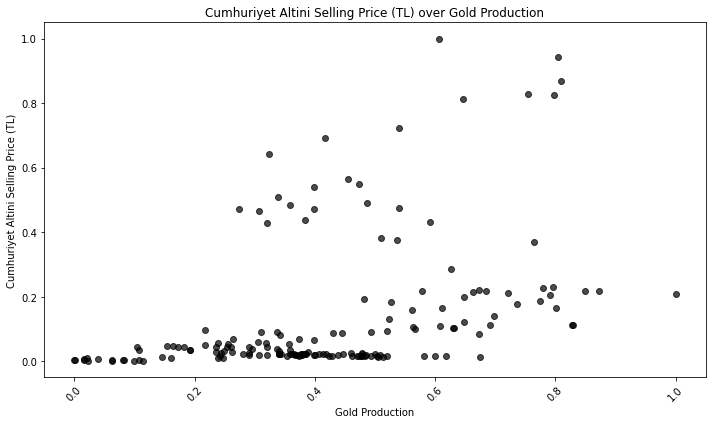

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(gold_production['Normalized'], cmh_selling_price['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('Gold Production')
plt.ylabel('Cumhuriyet Altini Selling Price (TL)')
plt.title("Cumhuriyet Altini Selling Price (TL) over Gold Production")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

#### The relationship between Gold Production and Cumhuriyet Altini Selling Price (TL) do not seem linear. Therefore we will calculate the selling prices in terms of USD, and check the relationship again.

## Cumhuriyet Altini Monthly Selling Prices (USD)

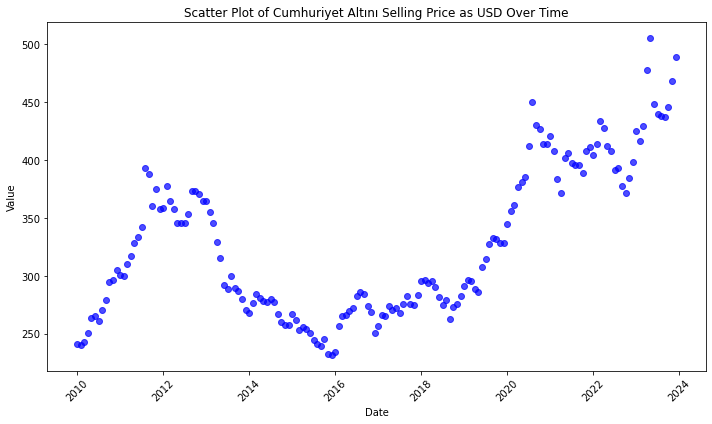

In [46]:
usd_buying_p = pd.read_excel("USD_buying_price.xlsx")   # Amerikan Doları Alış Fiyatı
usd_buying_p.rename(columns={'TP DK USD A YTL': 'value'}, inplace=True)
usd_buying_p['Tarih'] = pd.to_datetime(usd_buying_p['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(usd_buying_p['Tarih'], cmh_selling_price["value"]/usd_buying_p['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Cumhuriyet Altını Selling Price as USD Over Time')

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

In [47]:
gold_selling_price_usd = pd.DataFrame({
    'Tarih': cmh_selling_price['Tarih'],
    'value': cmh_selling_price['value'] / usd_buying_p['value']
})

In [48]:
gold_selling_price_usd['Normalized'] = scaler.fit_transform(gold_selling_price_usd[['value']])
gold_selling_price_usd

,Tarih,value,Normalized
0,2010-01-01,241.156463,0.034684
1,2010-02-01,240.397351,0.031906
2,2010-03-01,242.483660,0.039541
3,2010-04-01,250.469799,0.068765
4,2010-05-01,263.888889,0.117869
...,...,...,...
163,2023-08-01,438.033395,0.755116
164,2023-09-01,437.045286,0.751501
165,2023-10-01,445.593525,0.782781
166,2023-11-01,468.258132,0.865718


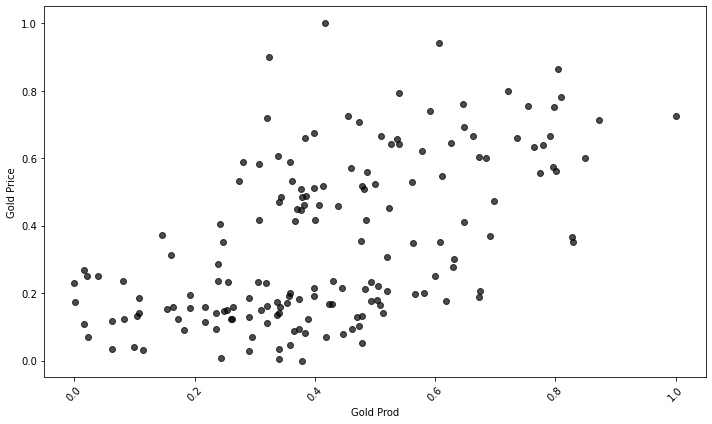

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(gold_production['Normalized'], gold_selling_price_usd['Normalized'], color='black', marker='o', label='Gold Prod vs Price', alpha=0.7)

plt.xlabel('Gold Prod')
plt.ylabel('Gold Price')

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

#### When the selling prices are calculated as USD, the relationship is close to linear as can be seen above. Therefore, the first independent variable for linear regression of gold production will be Gold Selling Price (USD).

## Monthly Gold Import Levels of Central Bank (mUSD)

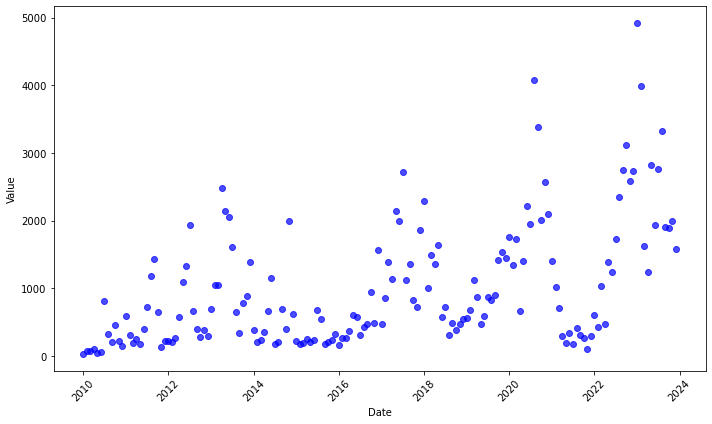

In [50]:
gold_import = pd.read_excel("gold_import.xlsx")    # Parasal Olmayan Altın İthalat (Milyon ABD doları)
gold_import.rename(columns={'TP HARICCARIACIK K3': 'value'}, inplace=True)
gold_import['Tarih'] = pd.to_datetime(gold_import['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(gold_import['Tarih'], gold_import['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show() 

In [51]:
gold_import

,Tarih,value
0,2010-01-01,26
1,2010-02-01,77
2,2010-03-01,71
3,2010-04-01,95
4,2010-05-01,40
...,...,...
163,2023-08-01,3324
164,2023-09-01,1909
165,2023-10-01,1888
166,2023-11-01,2000


In [52]:
gold_import['Normalized'] = scaler.fit_transform(gold_import[['value']])
gold_import

,Tarih,value,Normalized
0,2010-01-01,26,0.000000
1,2010-02-01,77,0.010419
2,2010-03-01,71,0.009193
3,2010-04-01,95,0.014096
4,2010-05-01,40,0.002860
...,...,...,...
163,2023-08-01,3324,0.673749
164,2023-09-01,1909,0.384678
165,2023-10-01,1888,0.380388
166,2023-11-01,2000,0.403269


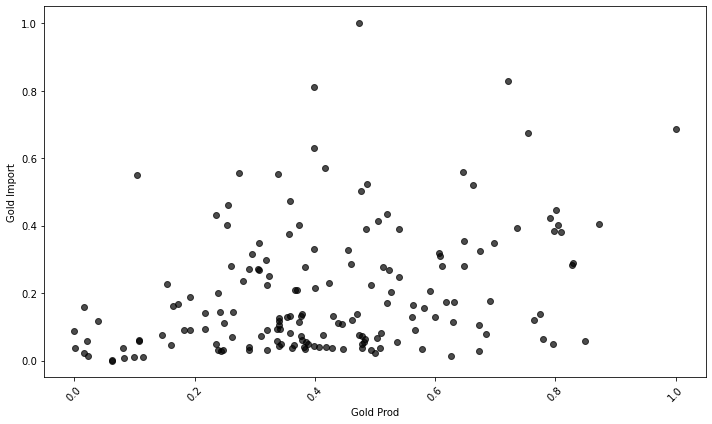

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(gold_production['Normalized'], gold_import['Normalized'], color='black', marker='o', label='Gold Prod vs Import', alpha=0.7)

plt.xlabel('Gold Prod')
plt.ylabel('Gold Import')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### There is a weak linear relationship between Gold Production levels and Gold Import data. The second independent variable will be taken as Gold Imports.

## Monthly Gold Reserves of Central Bank (mUSD)

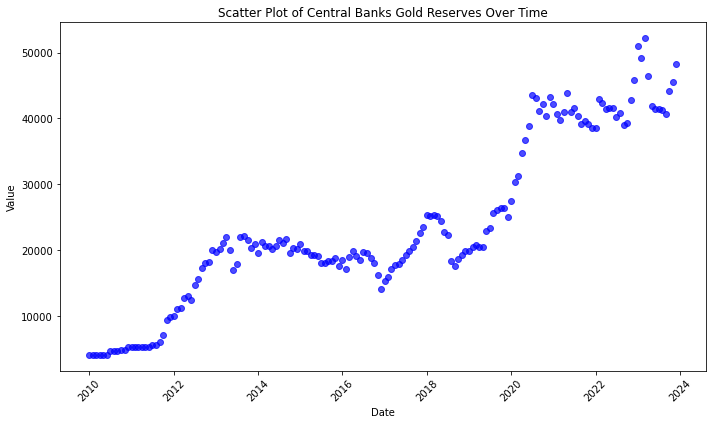

In [54]:
cb_gold_reserves = pd.read_excel("cb_gold_reserves.xlsx")          # Merkez Bankası Altın Rezervleri (Milyon ABD Doları)     
cb_gold_reserves.rename(columns={'TP AB C1': 'value'}, inplace=True)
cb_gold_reserves['Tarih'] = pd.to_datetime(cb_gold_reserves['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(cb_gold_reserves['Tarih'], cb_gold_reserves['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Central Banks Gold Reserves Over Time')

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show() 

In [55]:
cb_gold_reserves

,Tarih,value
0,2010-01-01,4121
1,2010-02-01,4121
2,2010-03-01,4121
3,2010-04-01,4153
4,2010-05-01,4153
...,...,...
163,2023-08-01,41343
164,2023-09-01,40628
165,2023-10-01,44148
166,2023-11-01,45495


In [56]:
cb_gold_reserves['Normalized'] = scaler.fit_transform(cb_gold_reserves[['value']])
cb_gold_reserves

,Tarih,value,Normalized
0,2010-01-01,4121,0.000000
1,2010-02-01,4121,0.000000
2,2010-03-01,4121,0.000000
3,2010-04-01,4153,0.000666
4,2010-05-01,4153,0.000666
...,...,...,...
163,2023-08-01,41343,0.774587
164,2023-09-01,40628,0.759708
165,2023-10-01,44148,0.832959
166,2023-11-01,45495,0.860990


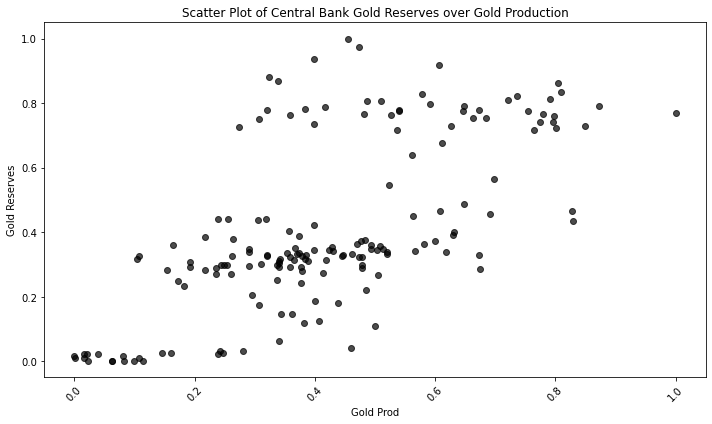

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(gold_production['Normalized'], cb_gold_reserves['Normalized'], color='black', marker='o', label='Gold Prod vs Import', alpha=0.7)

plt.xlabel('Gold Prod')
plt.ylabel('Gold Reserves')
plt.title('Scatter Plot of Central Bank Gold Reserves over Gold Production')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Gold Production and Gold Reserves of Central Bank seem to have a linear relationship as can be seen above. The third variable will be, therefore, the Gold Reserve levels of Central Bank.

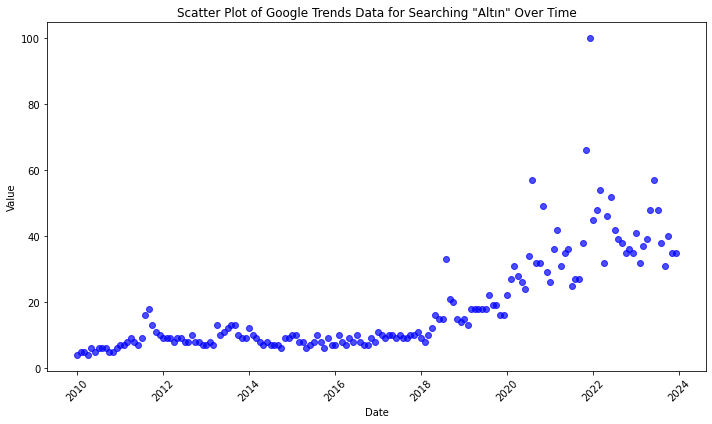

In [58]:
trends_altin = pd.read_excel("googletrends_altin.xlsx")           
trends_altin.rename(columns={'altin': 'value'}, inplace=True)  
trends_altin['Tarih'] = pd.to_datetime(trends_altin['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(trends_altin['Tarih'], trends_altin['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Google Trends Data for Searching "Altın" Over Time')

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show() 

In [59]:
trends_altin

,Tarih,value
0,2010-01-01,4
1,2010-02-01,5
2,2010-03-01,5
3,2010-04-01,4
4,2010-05-01,6
...,...,...
163,2023-08-01,38
164,2023-09-01,31
165,2023-10-01,40
166,2023-11-01,35


In [60]:
trends_altin['Normalized'] = scaler.fit_transform(trends_altin[['value']])
trends_altin

,Tarih,value,Normalized
0,2010-01-01,4,0.000000
1,2010-02-01,5,0.010417
2,2010-03-01,5,0.010417
3,2010-04-01,4,0.000000
4,2010-05-01,6,0.020833
...,...,...,...
163,2023-08-01,38,0.354167
164,2023-09-01,31,0.281250
165,2023-10-01,40,0.375000
166,2023-11-01,35,0.322917


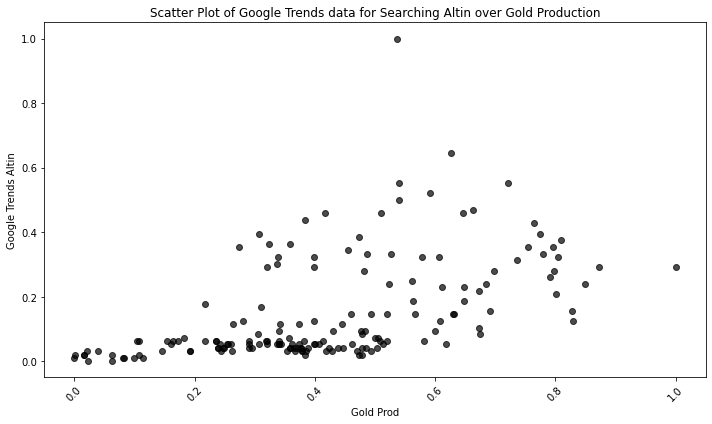

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(gold_production['Normalized'], trends_altin['Normalized'], color='black', marker='o', label='Gold Prod vs Google Trends Altin', alpha=0.7)

plt.xlabel('Gold Prod')
plt.ylabel('Google Trends Altin')
plt.title('Scatter Plot of Google Trends data for Searching Altin over Gold Production')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Gold Production and Google Trends data for "Altın" seem to have a weak linear relationship as can be seen above. The last variable will be Google Trends search data.

## First Model

In [62]:
# Merge datasets based on the shared date index
gold_data = gold_production[['Normalized']].copy()  # Create a new DataFrame with gold_production's 'value' column
gold_data = gold_data.merge(gold_selling_price_usd[['Normalized']], left_index=True, right_index=True, suffixes=('_production', '_selling_price_usd'))
gold_data = gold_data.merge(gold_import[['Normalized']], left_index=True, right_index=True)
gold_data = gold_data.merge(cb_gold_reserves[['Normalized']], left_index=True, right_index=True)
gold_data = gold_data.merge(trends_altin[['Normalized']], left_index=True, right_index=True)

# Rename columns for clarity
gold_data.columns = ['gold_production', 'gold_selling_price_usd', 'gold_import', 'cb_gold_reserves', 'trends_altin']

gold_data

,gold_production,gold_selling_price_usd,gold_import,cb_gold_reserves,trends_altin
0,0.063475,0.034684,0.000000,0.000000,0.000000
1,0.114823,0.031906,0.010419,0.000000,0.010417
2,0.100092,0.039541,0.009193,0.000000,0.010417
3,0.022623,0.068765,0.014096,0.000666,0.000000
4,0.062138,0.117869,0.002860,0.000666,0.020833
...,...,...,...,...,...
163,0.754615,0.755116,0.673749,0.774587,0.354167
164,0.798414,0.751501,0.384678,0.759708,0.281250
165,0.808778,0.782781,0.380388,0.832959,0.375000
166,0.803703,0.865718,0.403269,0.860990,0.322917


In [63]:
# Prepare the data for regression analysis
X = gold_data[['gold_selling_price_usd', 'gold_import', 'cb_gold_reserves', 'trends_altin']]
y = gold_data['gold_production']

# Add a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        gold_production   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     35.75
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.99e-21
Time:                        22:59:37   Log-Likelihood:                 78.386
No. Observations:                 168   AIC:                            -146.8
Df Residuals:                     163   BIC:                            -131.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [64]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8484924616960704


#### The R-squared value of this model (0.454) is not satisfactory. Let's build another model without intercept.

## Second Model

In [65]:
# Prepare the data for regression analysis
X = gold_data[['gold_selling_price_usd', 'gold_import', 'cb_gold_reserves', 'trends_altin']]
y = gold_data['gold_production']

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        gold_production   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              253.6
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                    4.23e-69
Time:                        22:59:38   Log-Likelihood:                          54.795
No. Observations:                 168   AIC:                                     -101.6
Df Residuals:                     164   BIC:                                     -89.09
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [66]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 7.921882672098132


#### A better R-squared was obtained by removing the intercept from the model (0.857). When we check the individual p-values, Gold Import data seem not significant for the Gold Production regression, with a p-value of 0.472. Let's look at the marginal contribution of Gold Import data to the residuals in order to see whether there is a non-linear relationship between them.

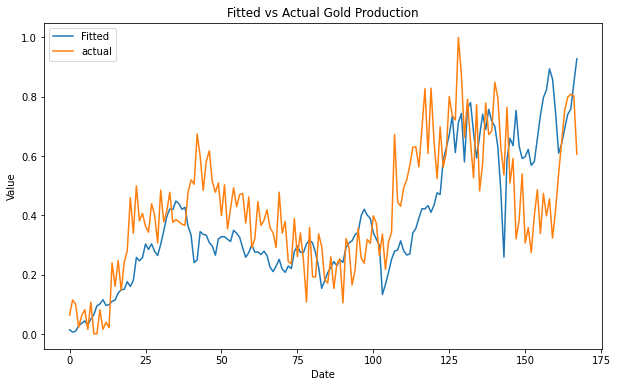

In [67]:
fitted = 0.4077*gold_selling_price_usd["Normalized"] -0.0646*gold_import["Normalized"] + 0.8244*cb_gold_reserves["Normalized"] -0.5944*trends_altin["Normalized"]

plt.figure(figsize=(10, 6))
plt.plot(fitted, label='Fitted')
plt.plot(gold_production["Normalized"], label='actual')

plt.title('Fitted vs Actual Gold Production')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

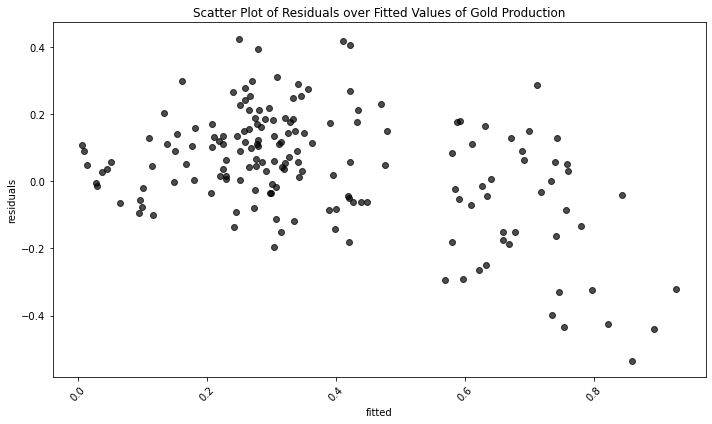

In [68]:
residuals = gold_production['Normalized'] - fitted

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('residuals')
plt.title('Scatter Plot of Residuals over Fitted Values of Gold Production')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

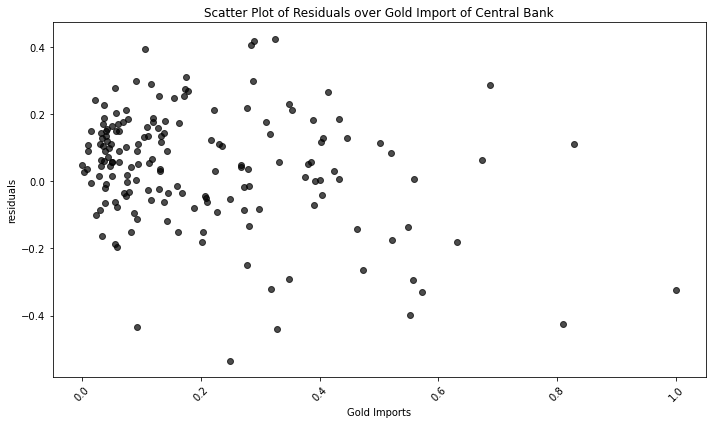

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(gold_import["Normalized"],residuals, color='black', marker='o', alpha=0.7)

plt.xlabel('Gold Imports')
plt.ylabel('residuals')
plt.title('Scatter Plot of Residuals over Gold Import of Central Bank')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### The variance of the residuals are increasing as Gold Import values increase. When we checked the linear relalionship between Gold Production and Gold Imports before, it was not a strong linear relationship. Let's discard the Gold Imports data from the model and see if there is any improvement. 

## Third Model

In [70]:
# Prepare the data for regression analysis
X = gold_data[['gold_selling_price_usd', 'cb_gold_reserves', 'trends_altin']]
y = gold_data['gold_production']

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        gold_production   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.858
Method:                 Least Squares   F-statistic:                              338.9
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                    2.74e-70
Time:                        22:59:38   Log-Likelihood:                          54.529
No. Observations:                 168   AIC:                                     -103.1
Df Residuals:                     165   BIC:                                     -93.69
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [71]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 10.557095917231516


#### Discarding gold imports yielded a little better R-squared value (from 0.857 to 0.858). 

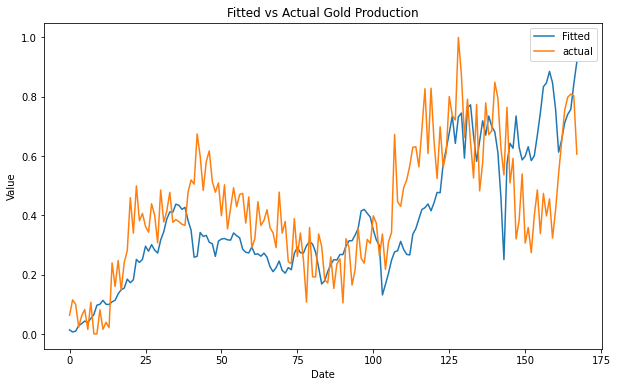

In [72]:
fitted = 0.3950*gold_selling_price_usd["Normalized"] + 0.7988*cb_gold_reserves["Normalized"] -0.5796*trends_altin["Normalized"]

plt.figure(figsize=(10, 6))
plt.plot(fitted, label='Fitted')
plt.plot(gold_production["Normalized"], label='actual')

plt.title('Fitted vs Actual Gold Production')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

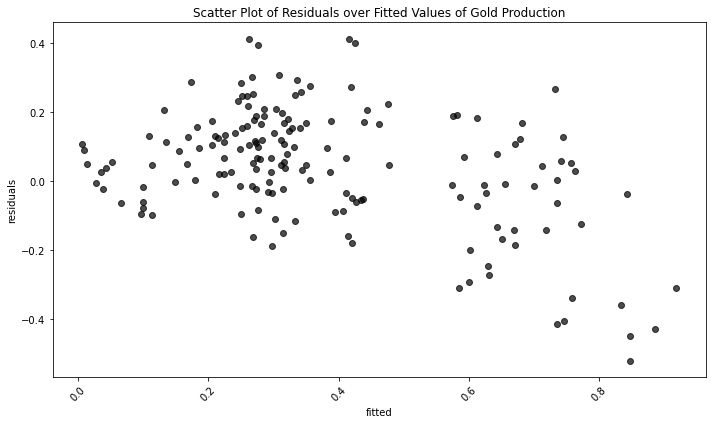

In [73]:
residuals = gold_production['Normalized'] - fitted

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('residuals')
plt.title('Scatter Plot of Residuals over Fitted Values of Gold Production')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

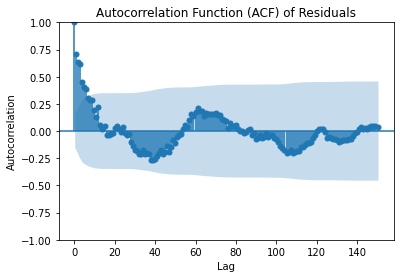

In [74]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

#### The model is still not satisfactory. The mean of the residuals are decreasing as the fitted values increase. Also, the variance of the residuals is increasing as the fitted values increase. We need another independent variable to improve the model.

#### Since the response variable is the Gold Production levels of BIST companies, BIS100 index may be a relevant independent variable. Below we add BIST100 index data to the model.

## Fourth Model

In [75]:
BIST100_index_monthly = pd.read_excel("BIST100_index_monthly.xlsx")           
BIST100_index_monthly.rename(columns={'TP MK F BILESIK': 'value'}, inplace=True)  
BIST100_index_monthly['Tarih'] = pd.to_datetime(BIST100_index_monthly['Tarih'])
BIST100_index_monthly['Normalized'] = scaler.fit_transform(BIST100_index_monthly[['value']])


gold_data = gold_production[['Normalized']].copy()  # Create a new DataFrame with gold_production's 'value' column
gold_data = gold_data.merge(gold_selling_price_usd[['Normalized']], left_index=True, right_index=True, suffixes=('_production', '_selling_price_usd'))
gold_data = gold_data.merge(cb_gold_reserves[['Normalized']], left_index=True, right_index=True)
gold_data = gold_data.merge(trends_altin[['Normalized']], left_index=True, right_index=True)
gold_data = gold_data.merge(BIST100_index_monthly[['Normalized']], left_index=True, right_index=True)

# Rename columns for clarity
gold_data.columns = ['gold_production', 'gold_selling_price_usd', 'cb_gold_reserves', 'trends_altin', 'BIST100_index_monthly']

gold_data

,gold_production,gold_selling_price_usd,cb_gold_reserves,trends_altin,BIST100_index_monthly
0,0.063475,0.034684,0.000000,0.000000,0.005923
1,0.114823,0.031906,0.000000,0.010417,0.000000
2,0.100092,0.039541,0.000000,0.010417,0.009699
3,0.022623,0.068765,0.000666,0.000000,0.011961
4,0.062138,0.117869,0.000666,0.020833,0.005930
...,...,...,...,...,...
163,0.754615,0.755116,0.774587,0.354167,0.946817
164,0.798414,0.751501,0.759708,0.281250,1.000000
165,0.808778,0.782781,0.832959,0.375000,0.895316
166,0.803703,0.865718,0.860990,0.322917,0.950729


In [76]:
# Prepare the data for regression analysis
X = gold_data[['gold_selling_price_usd', 'cb_gold_reserves', 'trends_altin', 'BIST100_index_monthly']]
y = gold_data['gold_production']

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        gold_production   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              306.7
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                    5.38e-75
Time:                        22:59:39   Log-Likelihood:                          68.728
No. Observations:                 168   AIC:                                     -129.5
Df Residuals:                     164   BIC:                                     -117.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [77]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 8.11763690767543


#### The last model yielded the best R-squared value so far, which is 0.879. Newly added variable BIST100 index has a very significant p-value, below 0.001. However the coefficient being negative is unexpected. One may comment on this situation as the following: when BIST100 index increases, investors/companies prefer to invest in the stock market. On the other hand, while the BIST100 index is decreasing, investors/companies may prefer investing in gold to stock market. Therefore the gold production increases. 

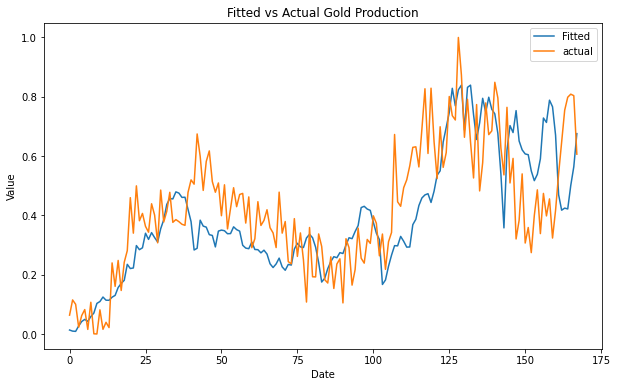

In [78]:
fitted = 0.4609*gold_selling_price_usd["Normalized"] + 0.8692*cb_gold_reserves["Normalized"] -0.4883*trends_altin["Normalized"]-0.4477*BIST100_index_monthly["Normalized"]

plt.figure(figsize=(10, 6))
plt.plot(fitted, label='Fitted')
plt.plot(gold_production["Normalized"], label='actual')

plt.title('Fitted vs Actual Gold Production')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

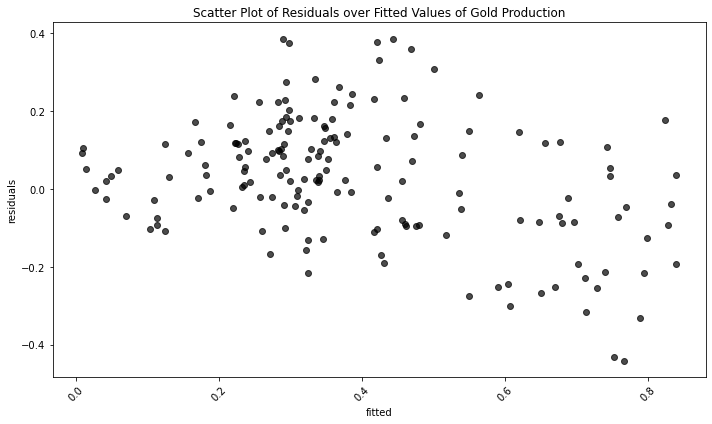

In [79]:
residuals = gold_production['Normalized'] - fitted

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('residuals')
plt.title('Scatter Plot of Residuals over Fitted Values of Gold Production')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

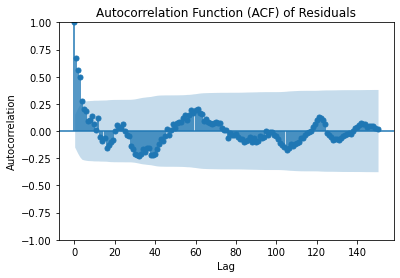

In [80]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

#### Let's add the lagged-1 and lagged-2 values of gold production to cope with the ACF of residuals in the above figure.

## Fifth Model

In [81]:
gold_production['lag1'] = gold_production['Normalized'].shift(1)
gold_production['lag2'] = gold_production['Normalized'].shift(2)
gold_production

,Tarih,value,Normalized,lag1,lag2
0,2010-01-01,1394.480,0.063475,NaN,NaN
1,2010-02-01,1556.080,0.114823,0.063475,NaN
2,2010-03-01,1509.720,0.100092,0.114823,0.063475
3,2010-04-01,1265.910,0.022623,0.100092,0.114823
4,2010-05-01,1390.270,0.062138,0.022623,0.100092
...,...,...,...,...,...
163,2023-08-01,3569.637,0.754615,0.647000,0.540219
164,2023-09-01,3707.483,0.798414,0.754615,0.647000
165,2023-10-01,3740.100,0.808778,0.798414,0.754615
166,2023-11-01,3724.129,0.803703,0.808778,0.798414


In [82]:
gold_production['lag1'] = gold_production['lag1'].fillna(0.063475)
gold_production['lag2'] = gold_production['lag2'].fillna(0.063475)
gold_production

,Tarih,value,Normalized,lag1,lag2
0,2010-01-01,1394.480,0.063475,0.063475,0.063475
1,2010-02-01,1556.080,0.114823,0.063475,0.063475
2,2010-03-01,1509.720,0.100092,0.114823,0.063475
3,2010-04-01,1265.910,0.022623,0.100092,0.114823
4,2010-05-01,1390.270,0.062138,0.022623,0.100092
...,...,...,...,...,...
163,2023-08-01,3569.637,0.754615,0.647000,0.540219
164,2023-09-01,3707.483,0.798414,0.754615,0.647000
165,2023-10-01,3740.100,0.808778,0.798414,0.754615
166,2023-11-01,3724.129,0.803703,0.808778,0.798414


In [83]:
gold_data = gold_data.merge(gold_production['lag1'], left_index=True, right_index=True)
gold_data = gold_data.merge(gold_production['lag2'], left_index=True, right_index=True)

# Rename columns for clarity
gold_data.columns = ['gold_production', 'gold_selling_price_usd', 'cb_gold_reserves', 'trends_altin', 'BIST100_index_monthly', 'lag1', 'lag2']

gold_data

,gold_production,gold_selling_price_usd,cb_gold_reserves,trends_altin,BIST100_index_monthly,lag1,lag2
0,0.063475,0.034684,0.000000,0.000000,0.005923,0.063475,0.063475
1,0.114823,0.031906,0.000000,0.010417,0.000000,0.063475,0.063475
2,0.100092,0.039541,0.000000,0.010417,0.009699,0.114823,0.063475
3,0.022623,0.068765,0.000666,0.000000,0.011961,0.100092,0.114823
4,0.062138,0.117869,0.000666,0.020833,0.005930,0.022623,0.100092
...,...,...,...,...,...,...,...
163,0.754615,0.755116,0.774587,0.354167,0.946817,0.647000,0.540219
164,0.798414,0.751501,0.759708,0.281250,1.000000,0.754615,0.647000
165,0.808778,0.782781,0.832959,0.375000,0.895316,0.798414,0.754615
166,0.803703,0.865718,0.860990,0.322917,0.950729,0.808778,0.798414


In [84]:
# Prepare the data for regression analysis
X = gold_data[['gold_selling_price_usd', 'cb_gold_reserves', 'trends_altin', 'BIST100_index_monthly', 'lag1', 'lag2']]
y = gold_data['gold_production']

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        gold_production   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              531.8
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                   7.93e-104
Time:                        22:59:39   Log-Likelihood:                          143.67
No. Observations:                 168   AIC:                                     -275.3
Df Residuals:                     162   BIC:                                     -256.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [85]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 5.838693828770544


#### Adding lagged values of gold production to the model skyrocketed the R-squared value. With the addition, BIST100 index became unsignificant compared to the fourth model. A pure linear regression would not include lagged values, therefore I recommend the fourth model for a linear regression study. A more accurate model, however, can be obtained by adding lagged values.

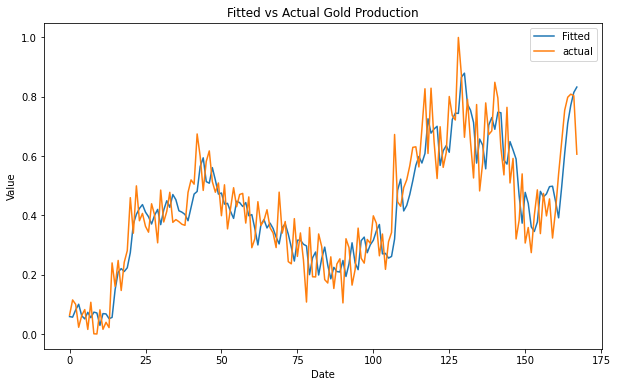

In [86]:
fitted = 0.1226*gold_selling_price_usd["Normalized"] + 0.1045*cb_gold_reserves["Normalized"] -0.1735*trends_altin["Normalized"]-0.0178*BIST100_index_monthly["Normalized"] + 0.4567*gold_production['lag1'] + 0.4034 * gold_production['lag2']

plt.figure(figsize=(10, 6))
plt.plot(fitted, label='Fitted')
plt.plot(gold_production["Normalized"], label='actual')

plt.title('Fitted vs Actual Gold Production')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Mean of Residuals:  0.005697102634758706


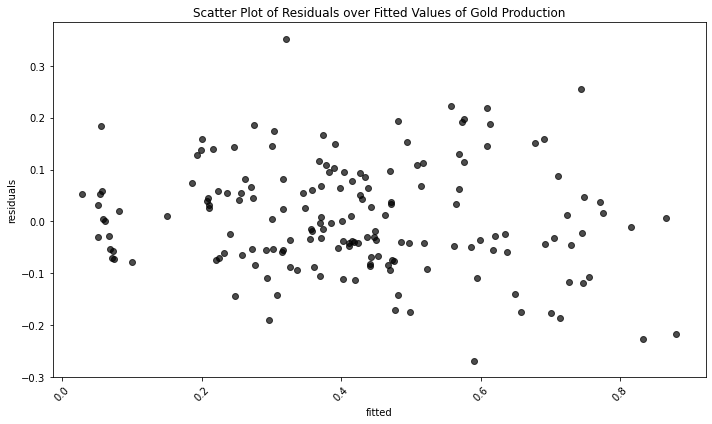

In [87]:
residuals = gold_production['Normalized'] - fitted
print("Mean of Residuals: ", residuals.mean())

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('residuals')
plt.title('Scatter Plot of Residuals over Fitted Values of Gold Production')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

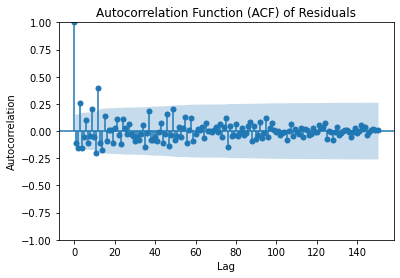

In [88]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

#### Linear regression assumptions hold more strongly in the last model as expected. Residuals have close to zero mean, and constant variance across the fitted value. The ACF for residuals is also improved by the addition of lagged values as expected. The model is completed. 

# Linear Regression for Central Bank's Current Account Level

Current account (cari) shows the balance position of Central Bank. For example, -6 units of current account mean, imports are 6 units more than exports, yielding 6 units of "cari açık". To deal with the absolute amount of current account deficit "cari açık", we will multiply the data with (-1).

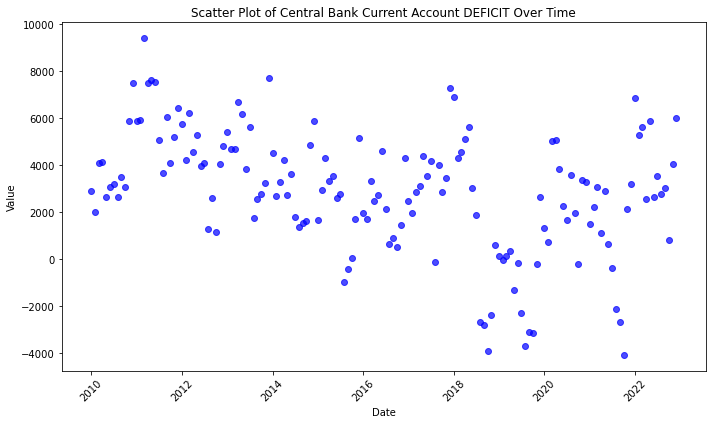

In [89]:
cb_current_account = pd.read_excel("cb_current_account.xlsx")    # Cari İşlemler Hesabı (Milyon ABD doları)
cb_current_account.rename(columns={'TP HARICCARIACIK K1': 'value'}, inplace=True)
cb_current_account['Tarih'] = pd.to_datetime(cb_current_account['Tarih'])
cb_current_account['value'] = -1*cb_current_account['value']

plt.figure(figsize=(10, 6)) 
plt.scatter(cb_current_account['Tarih'], cb_current_account['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Central Bank Current Account DEFICIT Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

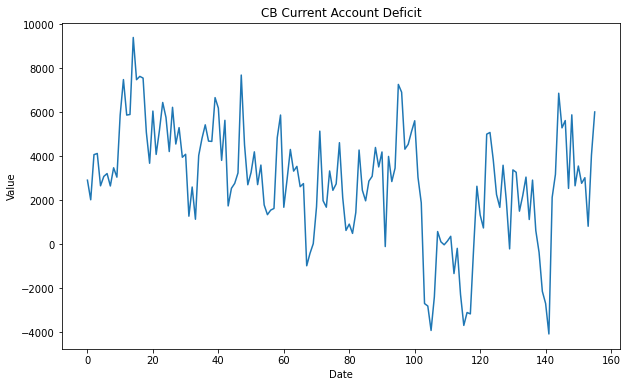

In [90]:
plt.figure(figsize=(10, 6)) 
plt.plot(cb_current_account['value'], label = "CB Current Account Deficit")
plt.xlabel('Date')
plt.ylabel('Value')
plt.title("CB Current Account Deficit")
plt.show()

In [91]:
cb_current_account['Normalized'] = scaler.fit_transform(cb_current_account[['value']])
cb_current_account

,Tarih,value,Normalized
0,2010-01-01,2911,0.518672
1,2010-02-01,2019,0.452579
2,2010-03-01,4073,0.604772
3,2010-04-01,4127,0.608773
4,2010-05-01,2655,0.499704
...,...,...,...
151,2022-08-01,2769,0.508151
152,2022-09-01,3024,0.527045
153,2022-10-01,814,0.363293
154,2022-11-01,4043,0.602549


## Amount of imported electrical energy (gMW)

We know that the imports of natural gas is one of factors responsible with the current account deficit of central bank. However, data for natural gas energy imports could not be found in EVDS. The data for electricity energy imports is found in TEIAŞ data servers and will be used as an alternative:
https://www.teias.gov.tr/turkiye-elektrik-uretim-iletim-istatistikleri

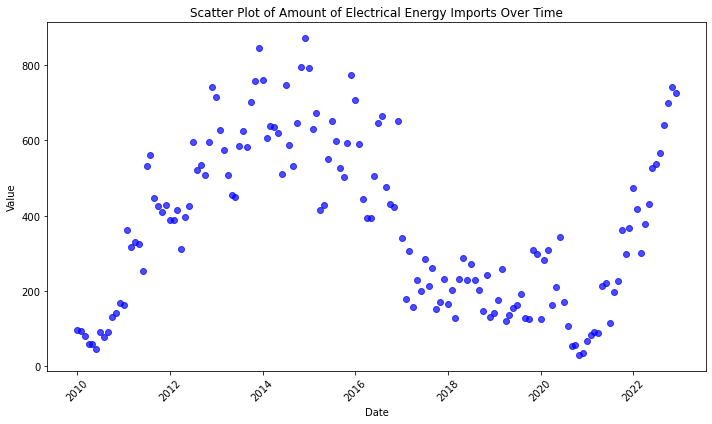

In [92]:
energy_imports = pd.read_excel("energy_import.xlsx")    # Ithal edilen elektrik enerjisi miktarı (gMW) / TEİAŞ
energy_imports.rename(columns={'import(gMW)': 'value'}, inplace=True)
energy_imports['Tarih'] = pd.to_datetime(energy_imports['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(energy_imports['Tarih'], energy_imports['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Amount of Electrical Energy Imports Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

In [93]:
energy_imports

,Tarih,value
0,2010-01-01,97.611000
1,2010-02-01,95.073000
2,2010-03-01,81.058000
3,2010-04-01,58.630000
4,2010-05-01,58.405000
...,...,...
151,2022-08-01,566.706033
152,2022-09-01,641.197013
153,2022-10-01,700.636746
154,2022-11-01,741.278401


In [94]:
energy_imports['Normalized'] = scaler.fit_transform(energy_imports[['value']])
energy_imports

,Tarih,value,Normalized
0,2010-01-01,97.611000,0.079645
1,2010-02-01,95.073000,0.076627
2,2010-03-01,81.058000,0.059958
3,2010-04-01,58.630000,0.033284
4,2010-05-01,58.405000,0.033017
...,...,...,...
151,2022-08-01,566.706033,0.637545
152,2022-09-01,641.197013,0.726138
153,2022-10-01,700.636746,0.796831
154,2022-11-01,741.278401,0.845166


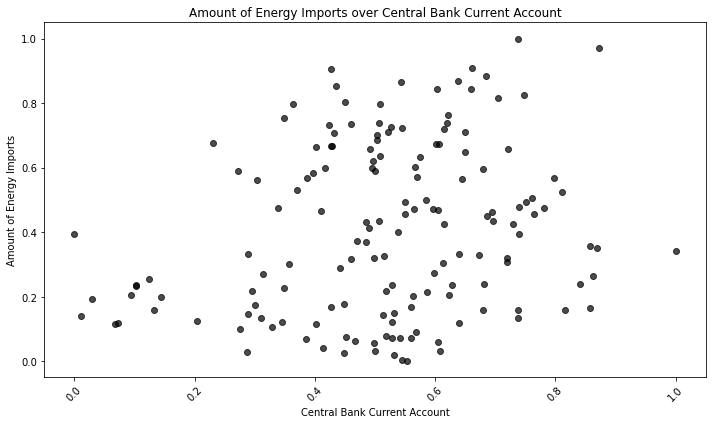

In [95]:
plt.figure(figsize=(10, 6))
plt.scatter(cb_current_account['Normalized'], energy_imports['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('Central Bank Current Account')
plt.ylabel('Amount of Energy Imports')
plt.title("Amount of Energy Imports over Central Bank Current Account")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

#### The first independent variable will be the energy imports amounts since the central bank's current account is correlated with energy imports as can be seen above.

## Exchange Rate (USD)

In [96]:
usd_buying_p

,Tarih,value
0,2010-01-01,1.47
1,2010-02-01,1.51
2,2010-03-01,1.53
3,2010-04-01,1.49
4,2010-05-01,1.53
...,...,...
163,2023-08-01,26.95
164,2023-09-01,26.94
165,2023-10-01,27.80
166,2023-11-01,28.59


In [97]:
# Delete last year of data since the response variable has data from 2010 to 2022

new_usd_buying_p = usd_buying_p.iloc[:-12].copy()
new_usd_buying_p

,Tarih,value
0,2010-01-01,1.47
1,2010-02-01,1.51
2,2010-03-01,1.53
3,2010-04-01,1.49
4,2010-05-01,1.53
...,...,...
151,2022-08-01,17.99
152,2022-09-01,18.28
153,2022-10-01,18.56
154,2022-11-01,18.59


In [98]:
new_usd_buying_p['Normalized'] = scaler.fit_transform(new_usd_buying_p[['value']])
new_usd_buying_p

,Tarih,value,Normalized
0,2010-01-01,1.47,0.002904
1,2010-02-01,1.51,0.005226
2,2010-03-01,1.53,0.006388
3,2010-04-01,1.49,0.004065
4,2010-05-01,1.53,0.006388
...,...,...,...
151,2022-08-01,17.99,0.962253
152,2022-09-01,18.28,0.979094
153,2022-10-01,18.56,0.995354
154,2022-11-01,18.59,0.997096


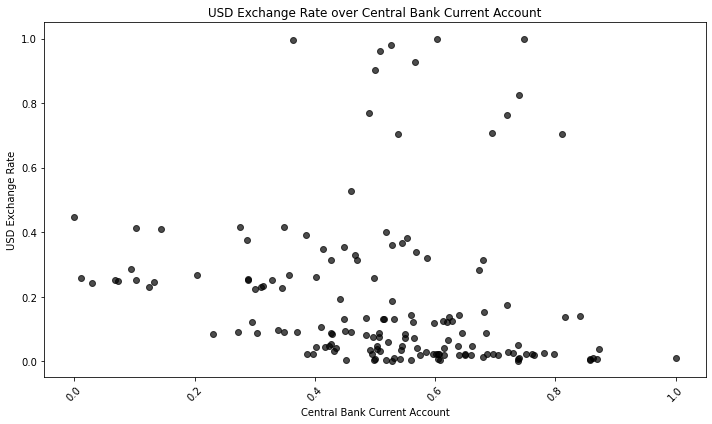

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(cb_current_account['Normalized'], new_usd_buying_p['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('Central Bank Current Account')
plt.ylabel('USD Exchange Rate')
plt.title("USD Exchange Rate over Central Bank Current Account")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

## Credit Volume Banking Sector (Thousand TL)

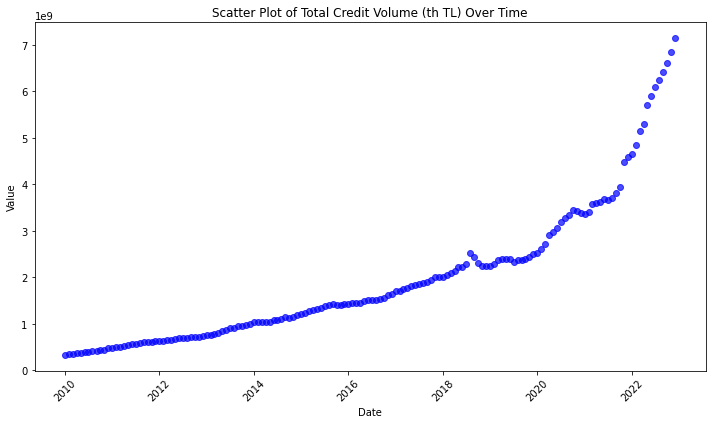

In [100]:
credit_volume = pd.read_excel("credit_volume.xlsx")    # TOPLAM YURT İÇİ KREDİ HACMİ Bankacılık Sektörü - Kredi Hacmi (Bin TL)
credit_volume.rename(columns={'TP KREHACBS A1': 'value'}, inplace=True)
credit_volume['Tarih'] = pd.to_datetime(credit_volume['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(credit_volume['Tarih'], credit_volume['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Total Credit Volume (th TL) Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

#### Since using both USD Exchange rates and Credit Volumes in Turkish Liras may lead to multicollinearity, we will calculate Credit Volume in USD and use it as independent variable.

In [101]:
credit_volume_usd = pd.DataFrame({
    'Tarih': credit_volume['Tarih'],
    'value': credit_volume['value'] / new_usd_buying_p['value']
})
credit_volume_usd

,Tarih,value
0,2010-01-01,2.282457e+08
1,2010-02-01,2.295785e+08
2,2010-03-01,2.350743e+08
3,2010-04-01,2.466297e+08
4,2010-05-01,2.505686e+08
...,...,...
151,2022-08-01,3.472891e+08
152,2022-09-01,3.511440e+08
153,2022-10-01,3.562457e+08
154,2022-11-01,3.684404e+08


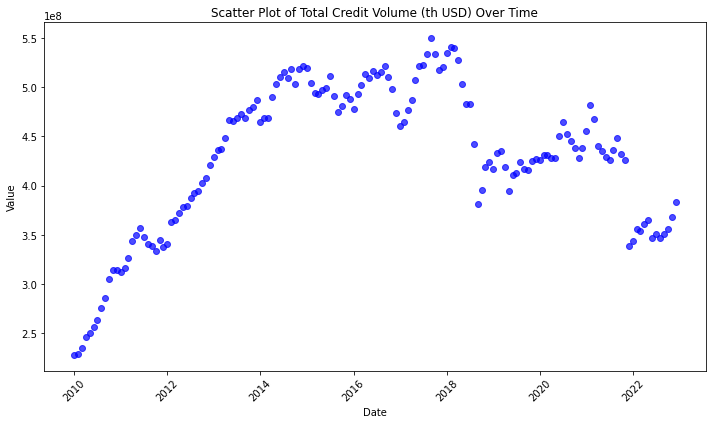

In [102]:
plt.figure(figsize=(10, 6)) 
plt.scatter(credit_volume_usd['Tarih'], credit_volume_usd['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Total Credit Volume (th USD) Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

In [103]:
credit_volume_usd['Normalized'] = scaler.fit_transform(credit_volume_usd[['value']])
credit_volume_usd

,Tarih,value,Normalized
0,2010-01-01,2.282457e+08,0.000000
1,2010-02-01,2.295785e+08,0.004147
2,2010-03-01,2.350743e+08,0.021246
3,2010-04-01,2.466297e+08,0.057198
4,2010-05-01,2.505686e+08,0.069454
...,...,...,...
151,2022-08-01,3.472891e+08,0.370383
152,2022-09-01,3.511440e+08,0.382377
153,2022-10-01,3.562457e+08,0.398249
154,2022-11-01,3.684404e+08,0.436191


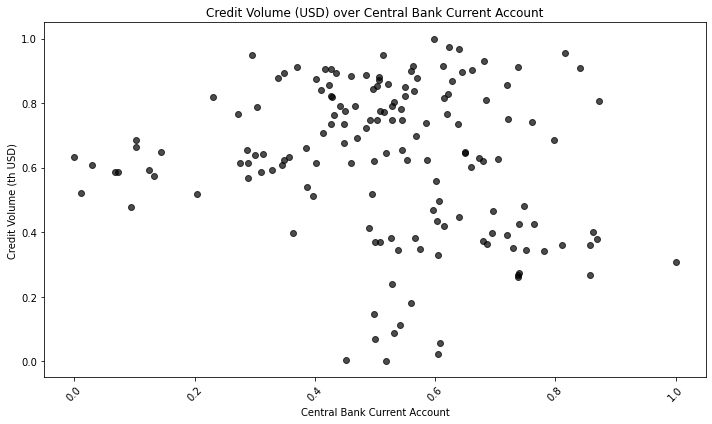

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(cb_current_account['Normalized'], credit_volume_usd['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('Central Bank Current Account')
plt.ylabel('Credit Volume (th USD)')
plt.title("Credit Volume (USD) over Central Bank Current Account")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

#### The second independent variable will be the credit volumes in USD.

## Trend & Seasonality Dummy Variables

#### From the plot of response variable we see a negative trend as time goes. In addition, since natural gas energy imports increase in winter, there should be some monthly seasonality which can be modeled.

<Figure size 720x432 with 0 Axes>

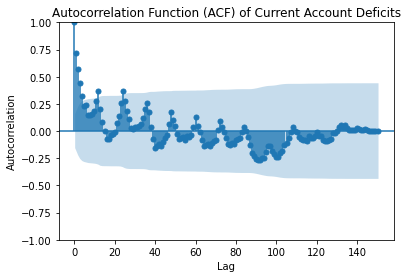

In [105]:
plt.figure(figsize=(10, 6))
plot_acf(cb_current_account["Normalized"], lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Current Account Deficits')
plt.show()

#### As intuitively stated, there is some monthly seasonality in the response variable.

In [106]:
trend = pd.DataFrame({
    'Tarih': credit_volume['Tarih'],
    'value': range(1, 157)
})
trend['Normalized'] = scaler.fit_transform(trend[['value']])
trend

,Tarih,value,Normalized
0,2010-01-01,1,0.000000
1,2010-02-01,2,0.006452
2,2010-03-01,3,0.012903
3,2010-04-01,4,0.019355
4,2010-05-01,5,0.025806
...,...,...,...
151,2022-08-01,152,0.974194
152,2022-09-01,153,0.980645
153,2022-10-01,154,0.987097
154,2022-11-01,155,0.993548


In [107]:
cb_account_data = cb_current_account[['Normalized']].copy() 
cb_account_data = cb_account_data.merge(energy_imports[['Tarih']], left_index=True, right_index=True, suffixes=('_production', '_selling_price_usd'))
cb_account_data = cb_account_data.merge(energy_imports[['Normalized']], left_index=True, right_index=True)
cb_account_data = cb_account_data.merge(credit_volume_usd[['Normalized']], left_index=True, right_index=True)
cb_account_data = cb_account_data.merge(trend[['Normalized']], left_index=True, right_index=True)

# Rename columns for clarity
cb_account_data.columns = ['cb_current_account', 'Date', 'energy_imports', 'credit_volume_usd', 'trend']
cb_account_data

<ipython-input-107-449e8006bbbf>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Normalized_x'} in the result is deprecated and will raise a MergeError in a future version.
  cb_account_data = cb_account_data.merge(trend[['Normalized']], left_index=True, right_index=True)


,cb_current_account,Date,energy_imports,credit_volume_usd,trend
0,0.518672,2010-01-01,0.079645,0.000000,0.000000
1,0.452579,2010-02-01,0.076627,0.004147,0.006452
2,0.604772,2010-03-01,0.059958,0.021246,0.012903
3,0.608773,2010-04-01,0.033284,0.057198,0.019355
4,0.499704,2010-05-01,0.033017,0.069454,0.025806
...,...,...,...,...,...
151,0.508151,2022-08-01,0.637545,0.370383,0.974194
152,0.527045,2022-09-01,0.726138,0.382377,0.980645
153,0.363293,2022-10-01,0.796831,0.398249,0.987097
154,0.602549,2022-11-01,0.845166,0.436191,0.993548


In [108]:
# Extract month from 'Date' column
cb_account_data['Month'] = cb_account_data['Date'].dt.month_name()

# Create dummy variables for months
month_dummies = pd.get_dummies(cb_account_data['Month'], prefix='', prefix_sep='')

# Concatenate dummy variables with the original DataFrame
cb_account_data = pd.concat([cb_account_data, month_dummies], axis=1)

# Drop the 'Month' column
cb_account_data.drop(columns=['Month'], inplace=True)

cb_account_data

,cb_current_account,Date,energy_imports,credit_volume_usd,trend,April,August,December,February,January,July,June,March,May,November,October,September
0,0.518672,2010-01-01,0.079645,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0
1,0.452579,2010-02-01,0.076627,0.004147,0.006452,0,0,0,1,0,0,0,0,0,0,0,0
2,0.604772,2010-03-01,0.059958,0.021246,0.012903,0,0,0,0,0,0,0,1,0,0,0,0
3,0.608773,2010-04-01,0.033284,0.057198,0.019355,1,0,0,0,0,0,0,0,0,0,0,0
4,0.499704,2010-05-01,0.033017,0.069454,0.025806,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.508151,2022-08-01,0.637545,0.370383,0.974194,0,1,0,0,0,0,0,0,0,0,0,0
152,0.527045,2022-09-01,0.726138,0.382377,0.980645,0,0,0,0,0,0,0,0,0,0,0,1
153,0.363293,2022-10-01,0.796831,0.398249,0.987097,0,0,0,0,0,0,0,0,0,0,1,0
154,0.602549,2022-11-01,0.845166,0.436191,0.993548,0,0,0,0,0,0,0,0,0,1,0,0


## First Model

In [109]:
# Prepare the data for regression analysis
X = cb_account_data[['energy_imports', 'credit_volume_usd', 'trend', 'April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']]
y = cb_account_data['cb_current_account']

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cb_current_account   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     9.199
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           4.02e-14
Time:                        22:59:42   Log-Likelihood:                 87.260
No. Observations:                 156   AIC:                            -144.5
Df Residuals:                     141   BIC:                            -98.77
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
energy_imports        0.1504      0.05

In [110]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1946773231341181


#### The model yielded a below-satisfactory R-squared value of 0.425. When we look at the individual p-values of each independent variable, almost all of them are significant except credit volumes (0.125). The coefficient of energy imports is positive, which was expected. Intuitively, the cental bank's account deficit would increase as energy imports increase. The trend variable has a negative coefficient, which was stated when trend variable is added (the plot of response variable yields a negative trend as time goes). The month information for central bank's current account came out very reasonable, with high coefficients for winter (0.7584, 0.6594, 0.6176) and low coefficients for summer (0.5868,0.5049, 0.4466). 
#### Let's add the gold imports (mUSD) used in the previous regression as another independent variable to explain central bank's current account deficits.

## Second Model

In [111]:
new_gold_import = gold_import.iloc[:-12].copy()     # Discard the last year of gold imports (mUSD) 
new_gold_import['Normalized'] = scaler.fit_transform(new_gold_import[['value']])
new_gold_import

,Tarih,value,Normalized
0,2010-01-01,26,0.000000
1,2010-02-01,77,0.012574
2,2010-03-01,71,0.011095
3,2010-04-01,95,0.017012
4,2010-05-01,40,0.003452
...,...,...,...
151,2022-08-01,2344,0.571499
152,2022-09-01,2754,0.672584
153,2022-10-01,3114,0.761341
154,2022-11-01,2584,0.630671


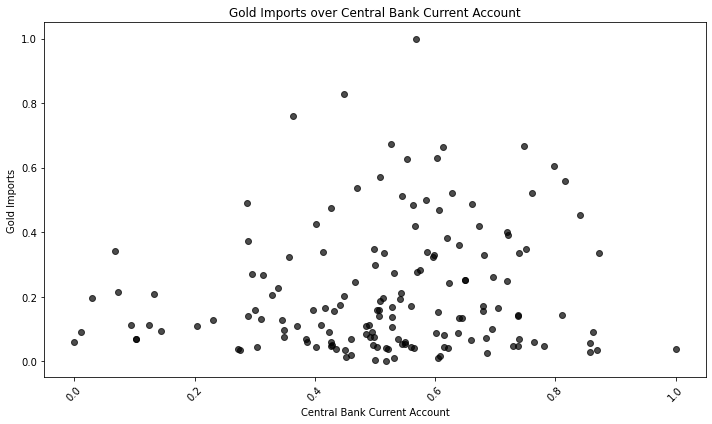

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(cb_account_data['cb_current_account'], new_gold_import['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('Central Bank Current Account')
plt.ylabel('Gold Imports')
plt.title("Gold Imports over Central Bank Current Account")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

In [113]:
cb_account_data = pd.concat([cb_account_data, new_gold_import['Normalized']], axis=1)
cb_account_data.rename(columns={'Normalized': 'Gold Imports'}, inplace=True)
cb_account_data

,cb_current_account,Date,energy_imports,credit_volume_usd,trend,April,August,December,February,January,July,June,March,May,November,October,September,Gold Imports
0,0.518672,2010-01-01,0.079645,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0.000000
1,0.452579,2010-02-01,0.076627,0.004147,0.006452,0,0,0,1,0,0,0,0,0,0,0,0,0.012574
2,0.604772,2010-03-01,0.059958,0.021246,0.012903,0,0,0,0,0,0,0,1,0,0,0,0,0.011095
3,0.608773,2010-04-01,0.033284,0.057198,0.019355,1,0,0,0,0,0,0,0,0,0,0,0,0.017012
4,0.499704,2010-05-01,0.033017,0.069454,0.025806,0,0,0,0,0,0,0,0,1,0,0,0,0.003452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.508151,2022-08-01,0.637545,0.370383,0.974194,0,1,0,0,0,0,0,0,0,0,0,0,0.571499
152,0.527045,2022-09-01,0.726138,0.382377,0.980645,0,0,0,0,0,0,0,0,0,0,0,1,0.672584
153,0.363293,2022-10-01,0.796831,0.398249,0.987097,0,0,0,0,0,0,0,0,0,0,1,0,0.761341
154,0.602549,2022-11-01,0.845166,0.436191,0.993548,0,0,0,0,0,0,0,0,0,1,0,0,0.630671


In [114]:
# Prepare the data for regression analysis
X = cb_account_data[['energy_imports', 'credit_volume_usd', 'trend', 'April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September', 'Gold Imports']]
y = cb_account_data['cb_current_account']

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cb_current_account   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     14.34
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.52e-21
Time:                        22:59:43   Log-Likelihood:                 109.25
No. Observations:                 156   AIC:                            -186.5
Df Residuals:                     140   BIC:                            -137.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
energy_imports        0.1499      0.04

In [115]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 0.230573742948278


#### In the second model, a better R-squared value is obtained (0.564). We will add another variable which is consumer price index monthly change before residual analysis.

## Third Model

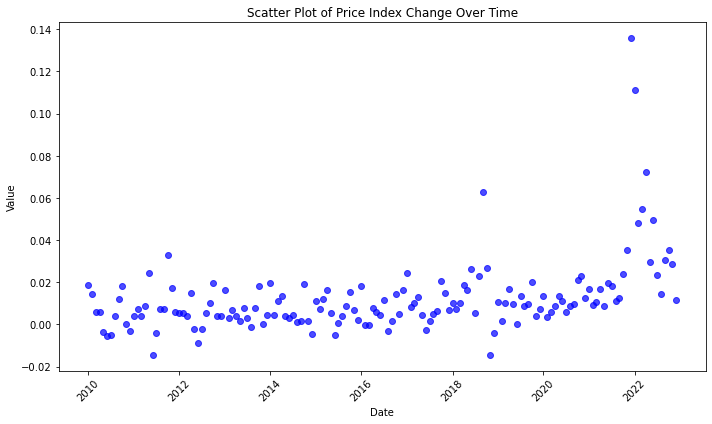

In [116]:
price_index_change = pd.read_excel("price_index.xlsx")    # TÜİK - Fiyat Endeksi Aylık Değişim (Tüketici) (2003=100)
price_index_change.rename(columns={'TP FG J0': 'value'}, inplace=True)
price_index_change['Tarih'] = pd.to_datetime(price_index_change['Tarih'])

plt.figure(figsize=(10, 6)) 
plt.scatter(price_index_change['Tarih'], price_index_change['value'], color='blue', marker='o', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Scatter Plot of Price Index Change Over Time')


plt.xticks(rotation=45)
plt.tight_layout() 
plt.show() 

In [117]:
price_index_change['Normalized'] = scaler.fit_transform(price_index_change[['value']])
price_index_change

,Tarih,value,Normalized
0,2010-01-01,0.018489,0.219187
1,2010-02-01,0.014477,0.192471
2,2010-03-01,0.005833,0.134914
3,2010-04-01,0.005968,0.135813
4,2010-05-01,-0.003582,0.072227
...,...,...,...
151,2022-08-01,0.014605,0.193324
152,2022-09-01,0.030759,0.300883
153,2022-10-01,0.035448,0.332106
154,2022-11-01,0.028838,0.288092


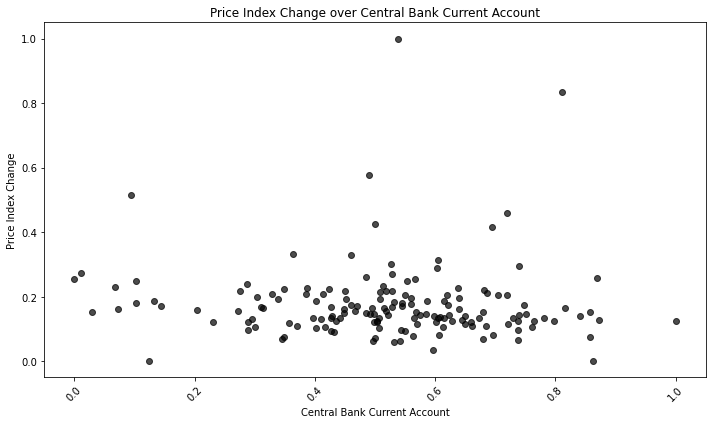

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(cb_account_data['cb_current_account'], price_index_change['Normalized'], color='black', marker='o', alpha=0.7)

plt.xlabel('Central Bank Current Account')
plt.ylabel('Price Index Change')
plt.title("Price Index Change over Central Bank Current Account")

plt.xticks(rotation=45)

plt.tight_layout() 
plt.show()

In [119]:
cb_account_data = pd.concat([cb_account_data, price_index_change['Normalized']], axis=1)
cb_account_data.rename(columns={'Normalized': 'price_index_change'}, inplace=True)
cb_account_data

,cb_current_account,Date,energy_imports,credit_volume_usd,trend,April,August,December,February,January,July,June,March,May,November,October,September,Gold Imports,price_index_change
0,0.518672,2010-01-01,0.079645,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.219187
1,0.452579,2010-02-01,0.076627,0.004147,0.006452,0,0,0,1,0,0,0,0,0,0,0,0,0.012574,0.192471
2,0.604772,2010-03-01,0.059958,0.021246,0.012903,0,0,0,0,0,0,0,1,0,0,0,0,0.011095,0.134914
3,0.608773,2010-04-01,0.033284,0.057198,0.019355,1,0,0,0,0,0,0,0,0,0,0,0,0.017012,0.135813
4,0.499704,2010-05-01,0.033017,0.069454,0.025806,0,0,0,0,0,0,0,0,1,0,0,0,0.003452,0.072227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.508151,2022-08-01,0.637545,0.370383,0.974194,0,1,0,0,0,0,0,0,0,0,0,0,0.571499,0.193324
152,0.527045,2022-09-01,0.726138,0.382377,0.980645,0,0,0,0,0,0,0,0,0,0,0,1,0.672584,0.300883
153,0.363293,2022-10-01,0.796831,0.398249,0.987097,0,0,0,0,0,0,0,0,0,0,1,0,0.761341,0.332106
154,0.602549,2022-11-01,0.845166,0.436191,0.993548,0,0,0,0,0,0,0,0,0,1,0,0,0.630671,0.288092


In [120]:
# Prepare the data for regression analysis
X = cb_account_data[['energy_imports', 'credit_volume_usd', 'trend', 'April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September', 'Gold Imports', 'price_index_change']]
y = cb_account_data['cb_current_account']

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cb_current_account   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     15.52
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.26e-23
Time:                        22:59:43   Log-Likelihood:                 116.59
No. Observations:                 156   AIC:                            -199.2
Df Residuals:                     139   BIC:                            -147.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
energy_imports         0.1039      0

In [121]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 0.228790839315392


#### A small improvement in R-squared is obtained (0.6). Since the p-value of credit volume variable is very high (0.85), we will discard it from the model as the last move.

## Fourth Model

In [122]:
# Prepare the data for regression analysis
X = cb_account_data[['energy_imports', 'trend', 'April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September', 'Gold Imports', 'price_index_change']]
y = cb_account_data['cb_current_account']

# Fit the time series regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     cb_current_account   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     16.67
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           3.06e-24
Time:                        22:59:43   Log-Likelihood:                 116.57
No. Observations:                 156   AIC:                            -201.1
Df Residuals:                     140   BIC:                            -152.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
energy_imports         0.1000      0

In [123]:
mse = model.mse_model
print("Mean Squared Error:", mse)

Mean Squared Error: 0.24400830748528418


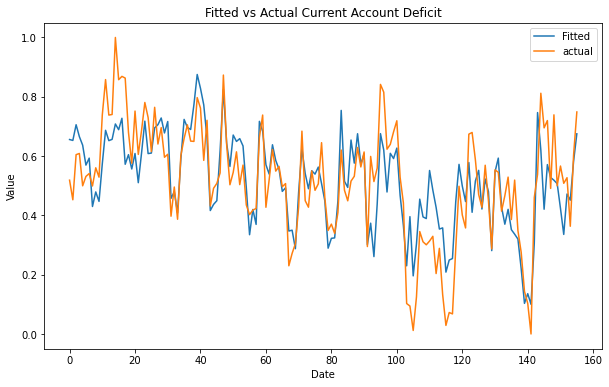

In [124]:
fitted = 0.100*energy_imports["Normalized"] -0.4346*trend["Normalized"] + 0.6057*cb_account_data["April"] + 0.3593*cb_account_data["August"] + 0.6567 * cb_account_data["December"] + 0.5613 * cb_account_data["February"] + 0.5556 * cb_account_data["January"] + 0.4898 * cb_account_data["July"] + 0.5529 * cb_account_data["June"] + 0.6436 * cb_account_data["March"] + 0.6127 * cb_account_data["May"] + 0.5265 * cb_account_data["November"] + 0.3215 * cb_account_data["October"] + 0.3991 * cb_account_data["September"] + 0.4458 * cb_account_data["Gold Imports"] + 0.4208 * cb_account_data["price_index_change"]

plt.figure(figsize=(10, 6))
plt.plot(fitted, label='Fitted')
plt.plot(cb_account_data["cb_current_account"], label='actual')

plt.title('Fitted vs Actual Current Account Deficit')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

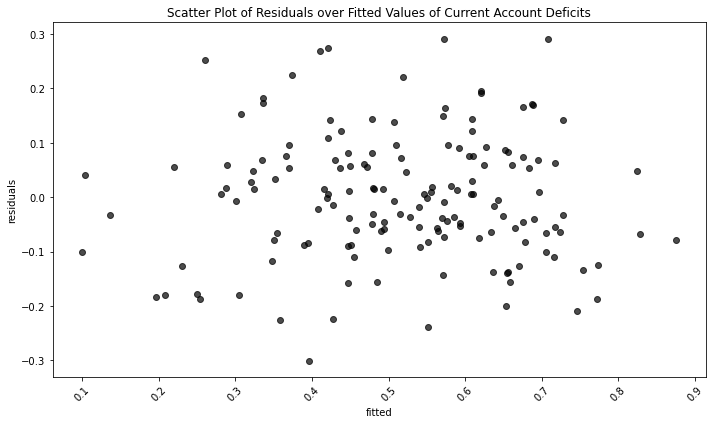

In [125]:
residuals = cb_account_data['cb_current_account'] - fitted

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='black', marker='o', alpha=0.7)

plt.xlabel('fitted')
plt.ylabel('residuals')
plt.title('Scatter Plot of Residuals over Fitted Values of Current Account Deficits')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### The mean and variance assumptions of linear regression seem to be hold from the previous graph. We move on with the ACF.

<Figure size 720x432 with 0 Axes>

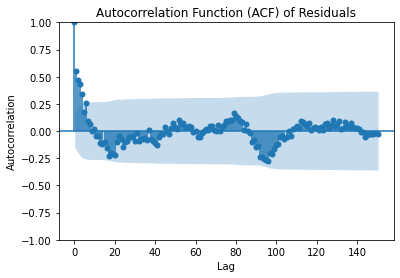

In [126]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=150)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.show()

#### As ACF suggests, we were able to break the monthly seasonality of current account deficits with month information. Lagged values may be added to the model for more accurate results for forecasting.

## Conclusions

In [127]:
models = pd.DataFrame({
    "Response Variable": [
        "BIST100 Transaction Volume", 
        "BIST100 Transaction Volume",
        "Gold Production",
        "Gold Production",
        "Gold Production",
        "Gold Production",
        "Gold Production",
        "CB Current Account Deficit",
        "CB Current Account Deficit",
        "CB Current Account Deficit",
        "CB Current Account Deficit"
    ],
    "Model Number": [
        "First Model", 
        "Second Model",
        "First Model",
        "Second Model",
        "Third Model",
        "Fourth Model",
        "Fifth Model",
        "First Model",
        "Second Model",
        "Third Model",
        "Fourth Model"
    ],
    "Independent Variables": [
        "Google Trends Borsa, Google Trends BIST100, Overnight Repo Rates, BIST100 index",
        "Google Trends Borsa, Google Trends BIST100, Overnight Repo Rates, BIST100 index, Lagged1 Values",
        "Gold Selling Price (USD), Gold Imports (mUSD), Central Bank Gold Reserves, Google Trends Altın, intercept",
        "Gold Selling Price (USD), Gold Imports (mUSD), Central Bank Gold Reserves, Google Trends Altın",
        "Gold Selling Price (USD),  Central Bank Gold Reserves, Google Trends Altın",
        "Gold Selling Price (USD),  Central Bank Gold Reserves, Google Trends Altın, BIST100 index",
        "Gold Selling Price (USD),  Central Bank Gold Reserves, Google Trends Altın, BIST100 index, Lagged1 Values, Lagged2 Values",
        "Energy Imports (gWh), Credit Volume (USD), Trend, Month (categorical)",
        "Energy Imports (gWh), Credit Volume (USD), Trend, Month (categorical), Gold Imports (mUSD)",
        "Energy Imports (gWh), Credit Volume (USD), Trend, Month (categorical), Gold Imports (mUSD), Consumer Price Index Change",
        "Energy Imports (gWh), Trend, Month (categorical), Gold Imports (mUSD), Consumer Price Index Change"
    ],
    "R-Squared": [
        "0.939",
        "0.952",
        "0.454",
        "0.857",
        "0.858",
        "0.879",
        "0.950",
        "0.425",
        "0.564",
        "0.600",
        "0.603"
    ],
    "MSE": [
        6.3108,
        5.1192,
        0.8485,
        7.9219,
        10.557,
        8.117,
        5.8387,
        0.1947,
        0.2306,
        0.2288,
        0.2441 
    ]
})

pd.set_option('display.max_colwidth', 100)
models

,Response Variable,Model Number,Independent Variables,R-Squared,MSE
0,BIST100 Transaction Volume,First Model,"Google Trends Borsa, Google Trends BIST100, Overnight Repo Rates, BIST100 index",0.939,6.3108
1,BIST100 Transaction Volume,Second Model,"Google Trends Borsa, Google Trends BIST100, Overnight Repo Rates, BIST100 index, Lagged1 Values",0.952,5.1192
2,Gold Production,First Model,"Gold Selling Price (USD), Gold Imports (mUSD), Central Bank Gold Reserves, Google Trends Altın, ...",0.454,0.8485
3,Gold Production,Second Model,"Gold Selling Price (USD), Gold Imports (mUSD), Central Bank Gold Reserves, Google Trends Altın",0.857,7.9219
4,Gold Production,Third Model,"Gold Selling Price (USD), Central Bank Gold Reserves, Google Trends Altın",0.858,10.5570
5,Gold Production,Fourth Model,"Gold Selling Price (USD), Central Bank Gold Reserves, Google Trends Altın, BIST100 index",0.879,8.1170
6,Gold Production,Fifth Model,"Gold Selling Price (USD), Central Bank Gold Reserves, Google Trends Altın, BIST100 index, Lagge...",0.950,5.8387
7,CB Current Account Deficit,First Model,"Energy Imports (gWh), Credit Volume (USD), Trend, Month (categorical)",0.425,0.1947
8,CB Current Account Deficit,Second Model,"Energy Imports (gWh), Credit Volume (USD), Trend, Month (categorical), Gold Imports (mUSD)",0.564,0.2306
9,CB Current Account Deficit,Third Model,"Energy Imports (gWh), Credit Volume (USD), Trend, Month (categorical), Gold Imports (mUSD), Cons...",0.600,0.2288


The first response variable of linear regression study was BIST100 transaction volume. While searching for independent variables, Google Trends data is utilized. It was anticipated that, when the search volume for "borsa" and "BIST100" increase, people would tend to enter transactions in the stock market. Therefore Google Trends search volume for those words are used as independent variables. Overnight repo rates was also considered to be correlated with the transaction volume, as it is expected that as repo rates increase, transaction volume decreases. The last independent variable was BIS100 index, as people would tend to enter transactions in the stock market to make money, as the index increases. Those 4 variables did a very good job in explaining the transaction volume, with an R-squared value of 0.939. The residual analysis also gave satisfactory results in terms of mean and variance assumptions. To yield a better model, lagged-1 values of transaction volume are also added to the model as ACF of residuals indicated. The second model's statistics acame out to be even better than the first one with this addition.  

The second response variable of the study was Gold Production Levels of BIST Mining Companies. Intuitively, it was thought that as gold prices increase, companies tend to produce more which was proved as the coefficient of gold prices is positive in all the models. The gold import levels seemed also relevant for explaining the gold producion levels, but later it is decided to be discarded from the model since the significance was too small. The third independent variable was the gold reserves in the central bank, whose coefficient was also positive. One may think that when the gold reserves of CB increase, the production should decrease since there would be less need for producing. However, the positive relationship can be explained as follows: when the reserves of CB increase, it reaches satisfactory levels for the domestic gold demand. In this case, the mining companies would increase their production levels to export some gold and make money. For the next variable, Google Trends searching data for "Altın" is visited. The coefficient of search volume is negative, surprisingly. Lastly, BIST100 index is also utilized for explaining gold production levels, since an increase in the index would result in more transactions in the stock market and less transactions for precious metals like gold, and finally less production levels. The coefficient of BIST100 index is negative, as expected. Five models were constructed for gold production levels, by adding/subtracting an independent variable as the results of residual analyzes. The fourth and fifth models of gold production regression analysis gave the best results. In the fifth model, lagged-1 and lagged-2 values of gold production levels are added compared to the fourth level, as ACF of residuals anticipated. 

The last dependent variable for the study was Central Bank's Current Account Deficits. As a general information, it is known that Turkey imports high levels of natural gas, which may lead to an increase in the account deficit. Unfortunately, data for natural gas imports could not found and data for electrical energy imports is used as an alternative. The total credit volume in the banking sector is also thought to be relevant to the inflation rates and so central bank account deficit. Nevertheless, it is discarded from the model as the p-value was too large. When the line plot and ACF of the response variable was plotted, it was concluded that there is a negative trend and monthly seasonality in the data. Therefore, a trend variable and categorical month information is also added to the model. The gold import levels, which was unsignificant for the gold production regression analysis, seemed relevant for the central bank's account deficit. As expected, the coefficient came out to be positive, meaning that as gold imports increase, the account deficit also increases as expected. Lastly, consumer price index change from previous months information is added to the model, as a representative of monthly inflation. As expected, it has a positive coefficient. The fourth model with all significant variables yielded very good results in terms of residual analysis.